## Problem Statement:
We hypothesize that this dataset contains independent variables that might be used to infer interesting facts about
buildings in New York. Of primary interest to us is the Energy Star score, since we believe this score is used as an
aggregate measure of a building’s energy performance.

Our question is simple to ask, but difficult to answer:

     Does this dataset contain a set of independent variables that correlate to the energy star rating of the building?
     For buildings without energy star scores, can you infer what their score might be?

To answer this question we ask that you prepare a reasoned investigation of this hypothesis in a Jupyter notebook.
We believe the best method is to perform visual statistical descriptions of the data using summary tables or a graphing
library of your choice. Then train a model and evaluate it. You might regress data to predict the numeric score - or bin
the scores into “grades” (A, B, C, D, F) and apply a classifier. You might cluster buildings to determine if similar
groups exist.

## Objectives
1. Importing Libraries
2. Preprocessing the data
   - Checking Missing Values
   - Checking for Outliers and treating
   - Check for Multicolinearity
   - Check for Zero Variance Columns
3. Visualisation of data   
4. Standardization
5. Encoding
6. Data Modelling
7. Machine Learnings models- Multiple Linear Regression, LASSO, RIDGE, Random Forest Regresor, Support Vector Regressor
8. Comparing the models
9. Conclusion

### Let us try building Regression Model that Predicts the Numeric Score of Energy Star score

## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Importing data into Pandas Dataframe


In [7]:
dataframe=pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
df=dataframe.copy()
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [8]:
df.shape

(11746, 60)

The Data contains 11746 rows and 60 Columns

#### When we observe the Data The missing data in the rows is written as Not Available in string data type,let us replace them with null values in the CSV file then again import

In [9]:
dataframe=pd.read_csv("Energy_and_Water_Data_Disclosure edited.csv")
df=dataframe.copy()
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,619.4,05-01-2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [10]:
df.tail(10)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
11736,14983,4950741,ROSENBERG: 1955 Grand Concourse,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2028080051,2-02808-0051\t,2007688,1955 Grand Concourse,NaN,...,140.5,04/26/2017 04:59:11 PM,Yes,NaN,40.850655,-73.905048,5.0,14.0,23501.0,Mount Hope ...
11737,14984,4950728,ROSENBERG: 1480 Popham Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2028770211,2-02877-0211\t,2008874,1480 Popham Ave,NaN,...,136.9,04/26/2017 04:59:11 PM,No,NaN,40.847884,-73.921891,5.0,14.0,20501.0,University Heights-Morris Heights ...
11738,14985,4408791,Milton Gordon: 679 WEST 239 STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2059200510,2-05920-0510\t,2085873,679 WEST 239 STREET,NaN,...,33.7,05-01-2017 13:22,No,NaN,40.889859,-73.914254,8.0,11.0,309.0,North Riverdale-Fieldston-Riverdale ...
11739,14986,4408781,Milton Gordon: 699 WEST 239 STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2059200687,2-05920-0687\t,2085876,699 WEST 239 STREET,NaN,...,78.8,04/26/2017 04:32:19 PM,NaN,NaN,40.889914,-73.914963,8.0,11.0,309.0,North Riverdale-Fieldston-Riverdale ...
11740,14987,4940405,Advanced: 161 Henry Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002370008,3-00237-0008\t,3001882,161 Henry Street,NaN,...,108.6,04/26/2017 11:20:06 AM,NaN,NaN,40.695759,-73.993826,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,24 Monroe Place,NaN,...,109.6,04/26/2017 11:20:06 AM,NaN,NaN,40.696420,-73.992495,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11742,14989,4940416,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,150 Joralemon Street,NaN,...,153.4,04/26/2017 11:20:06 AM,NaN,NaN,40.692602,-73.993231,2.0,33.0,7.0,Brooklyn Heights-Cobble Hill ...
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,267 6th Street,NaN,...,103.6,03/23/2017 02:51:02 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,NaN,...,92.7,04/26/2017 11:20:06 AM,NaN,NaN,40.670728,-73.971752,6.0,39.0,165.0,Park Slope-Gowanus ...
11745,14993,4952165,Tryad: 420 Clinton Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3019600022,3-01960-0022\t,3055969,420 Clinton Ave\t,NaN,...,161.9,04/27/2017 06:37:53 AM,Yes,NaN,40.685549,-73.968310,2.0,35.0,199.0,Clinton Hill ...


In [11]:
# Check the information of the Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [12]:
# Checking null values in percentage
df.isnull().sum()/len(df)*100

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

#### We can observe that Many Columns Have missing values more than 30%. lets Drop such columns

In [13]:
threshold = 0.3  
missing_percentage = df.isnull().mean() #finding Missing Percent
columns_to_drop = missing_percentage[missing_percentage >= threshold].index #Finding the Columns with >30%missing Values
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df.shape

(11746, 46)

After Droping the Columns with more than 30% of missing values we left with 46 columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [12]:
# Let us find the unique Values in various Columns of String data types
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")
    print(f"NO of unique values in {column} {len(unique_values)}")
    print("-----------------------------------------------------------------------")

Unique values in Property Name column: ['201/205' 'NYP Columbia (West Campus)' 'MSCHoNY North' ...
 '(9267) - 267 Sixth St' 'Advanced: 27 Prospect Park West'
 'Tryad: 420 Clinton Ave']
NO of unique values in Property Name 11740
-----------------------------------------------------------------------
Unique values in Parent Property Id column: ['13286' '28400' '28402' '2610789' '2637863' '2777235' '2777309' '2780056'
 '2806486' '2809896' '2825730' '2831114' '3111973' '3129181' '3129218'
 '3129231' '3129256' '3612678' '3614737' '3614751' '3615313' '3616399'
 '3617119' '3618216' '3617949' '3618185' '3618215' '3618219' '3924330'
 '4037976' '4046078' '4092487' '4288940' '4288948' '5032176' '4393741'
 '4397919' '4406828' '4440047' '4442227' '4442823' '5835940' '4442829'
 '4442836' '4455730' '4474039' '4483287' '4495788' '4517383' '4820364'
 '4868217' '4905373' '4905775' '4905795' '4905835' '4905862' '4956972'
 '4905873' '4907667' '4907678' '4907681' '4907691' '4907695' '4917990'
 '4919900' '4

#### Columns Such as Order, Property ID, Property name etc, that serve as identifiers and do not contribute to the target variable's prediction

In [16]:
columns_to_drop = ["Order", "Property Id", "Property Name", "Parent Property Id", "Parent Property Name", "BBL - 10 digits",
                   "NYC Borough, Block and Lot (BBL) self-reported","NYC Building Identification Number (BIN)","Address 1 (self-reported)",
                   "Postal Code","Street Number","Street Name","Primary Property Type - Self Selected","List of All Property Use Types at Property",
                   "Largest Property Use Type","Release Date","NTA"]

print("Columns that are used as identifiers and the object type wich can not be encoded to use fo the regression model are : ",columns_to_drop)

df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.shape

Columns that are used as identifiers and the object type wich can not be encoded to use fo the regression model are :  ['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)', 'Postal Code', 'Street Number', 'Street Name', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Release Date', 'NTA']


(11746, 29)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     11628 non-null  object 
 1   DOF Gross Floor Area                                        11628 non-null  float64
 2   Largest Property Use Type - Gross Floor Area (ft²)          11744 non-null  float64
 3   Year Built                                                  11746 non-null  int64  
 4   Number of Buildings - Self-reported                         11746 non-null  int64  
 5   Occupancy                                                   11746 non-null  int64  
 6   Metered Areas (Energy)                                      11689 non-null  object 
 7   ENERGY STAR Score                                           9642 non-null   float64
 

In [15]:
df_cleaned.isnull().sum()/len(df_cleaned)*100

Borough                                                        1.004597
DOF Gross Floor Area                                           1.004597
Largest Property Use Type - Gross Floor Area (ft²)             0.017027
Year Built                                                     0.000000
Number of Buildings - Self-reported                            0.000000
Occupancy                                                      0.000000
Metered Areas (Energy)                                         0.485272
ENERGY STAR Score                                             17.912481
Site EUI (kBtu/ft²)                                            1.387706
Weather Normalized Site EUI (kBtu/ft²)                        12.472331
Weather Normalized Site Electricity Intensity (kWh/ft²)        6.700153
Weather Normalized Site Natural Gas Intensity (therms/ft²)    16.712072
Weather Normalized Source EUI (kBtu/ft²)                      12.472331
Natural Gas Use (kBtu)                                        12

## Using Simple Imputer to impute missing Values

In [18]:
from sklearn.impute import SimpleImputer

numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
df_cleaned[numerical_columns] = numerical_imputer.fit_transform(df_cleaned[numerical_columns])

# Impute missing values for object-type columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_columns] = categorical_imputer.fit_transform(df_cleaned[categorical_columns])
df_cleaned.shape

(11746, 29)

In [19]:
df_cleaned.isnull().sum()/len(df_cleaned)*100

Borough                                                       0.0
DOF Gross Floor Area                                          0.0
Largest Property Use Type - Gross Floor Area (ft²)            0.0
Year Built                                                    0.0
Number of Buildings - Self-reported                           0.0
Occupancy                                                     0.0
Metered Areas (Energy)                                        0.0
ENERGY STAR Score                                             0.0
Site EUI (kBtu/ft²)                                           0.0
Weather Normalized Site EUI (kBtu/ft²)                        0.0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0.0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0.0
Weather Normalized Source EUI (kBtu/ft²)                      0.0
Natural Gas Use (kBtu)                                        0.0
Weather Normalized Site Natural Gas Use (therms)              0.0
Electricit

### Let us seperate the independent feature for visulaising dependent features seperately

In [20]:
Y_df=df_cleaned[["ENERGY STAR Score"]]
Y_df.head()

,ENERGY STAR Score
0,65.0
1,55.0
2,65.0
3,65.0
4,65.0


In [21]:
X_df=df_cleaned.drop(columns=["ENERGY STAR Score"])
X_df.head()

,Borough,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract
0,Manhattan,289356.0,293447.0,1963.0,2.0,100.0,Whole Building,305.6,303.1,37.8,...,6962.2,762051.0,619.4,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0
1,Manhattan,3693539.0,3889181.0,1969.0,12.0,100.0,Whole Building,229.8,228.8,24.8,...,4854.1,3889181.0,404.3,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0
2,Manhattan,152765.0,231342.0,1924.0,1.0,100.0,Whole Building,78.5,82.5,5.3,...,0.0,231342.0,124.9,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0
3,Manhattan,891040.0,1305748.0,1971.0,1.0,100.0,Whole Building,78.5,82.5,5.3,...,0.0,1305748.0,124.9,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0
4,Manhattan,211400.0,179694.0,1932.0,1.0,100.0,Whole Building,78.5,82.5,5.3,...,0.0,179694.0,124.9,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0


# Visualisation

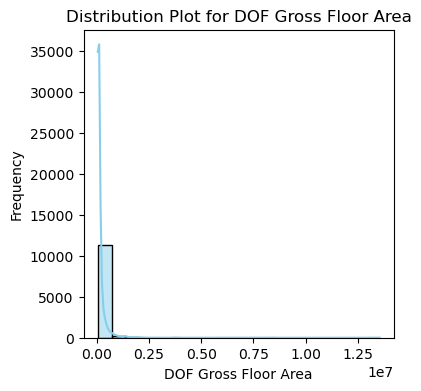

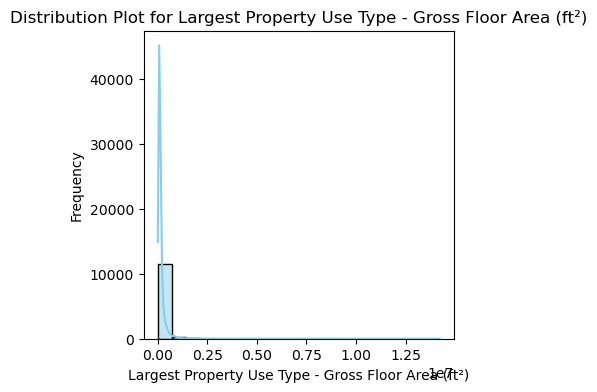

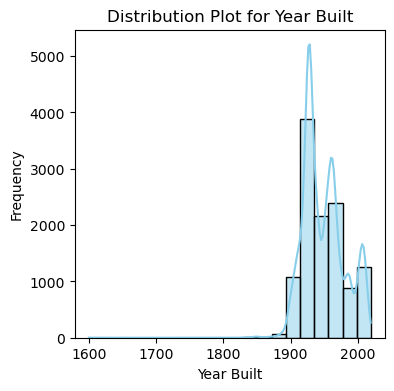

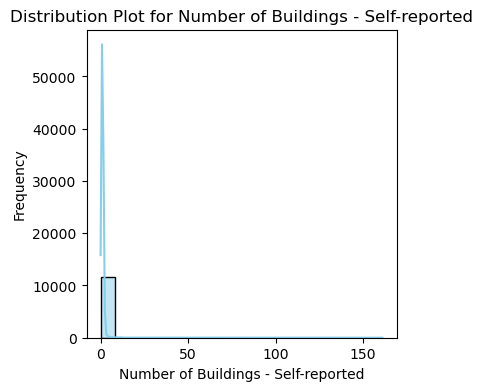

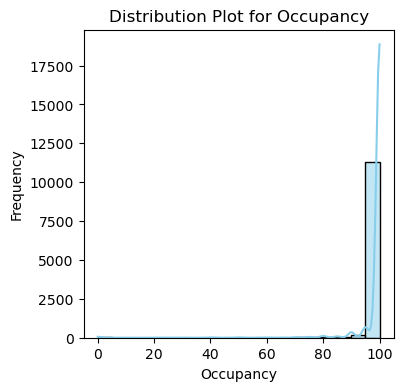

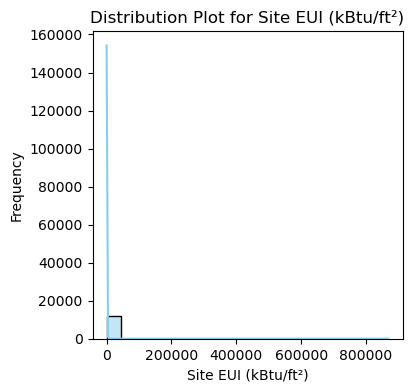

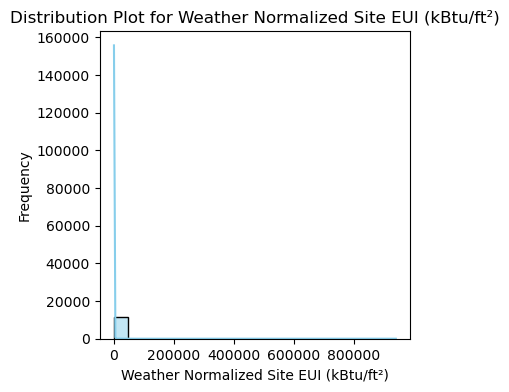

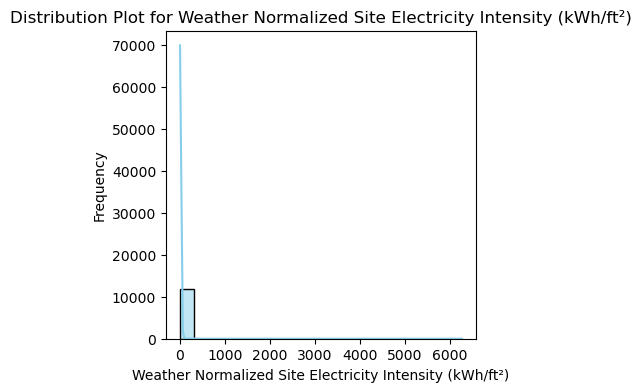

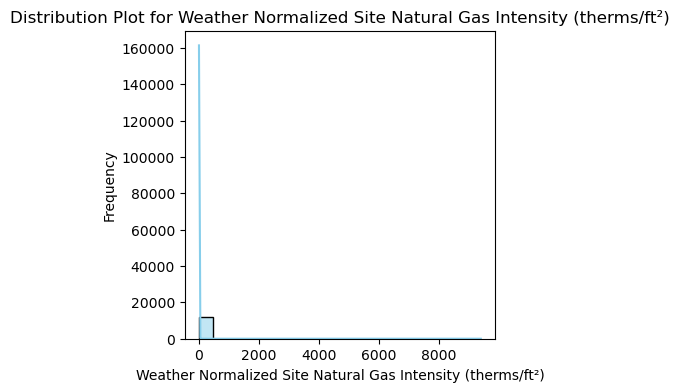

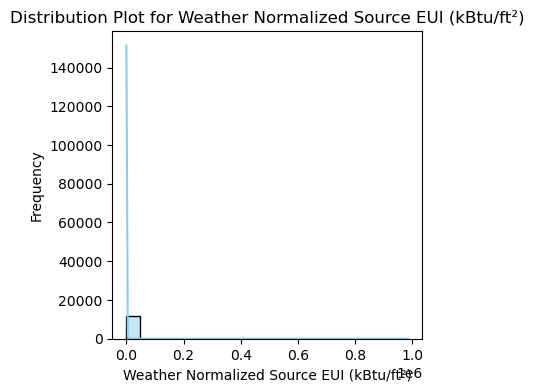

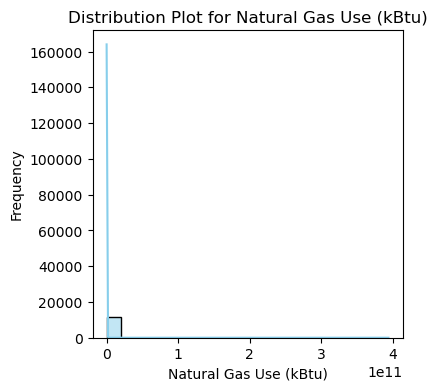

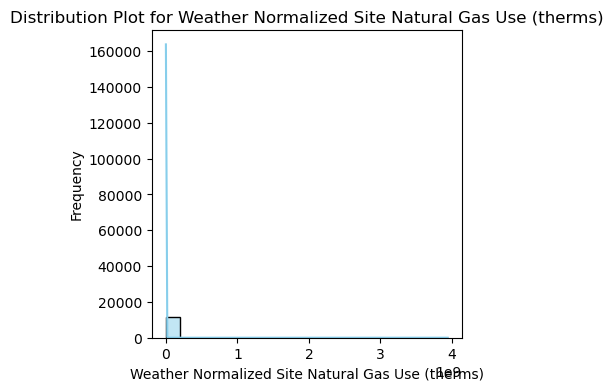

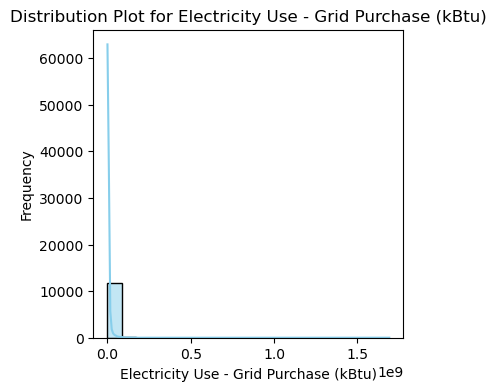

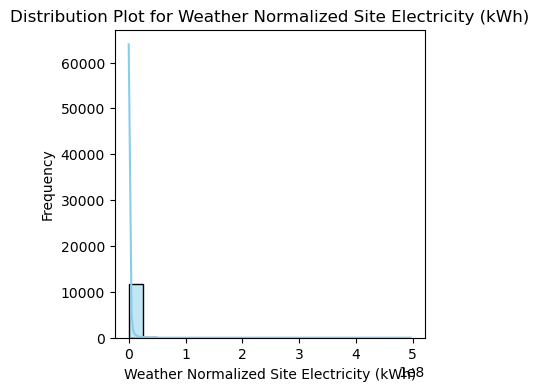

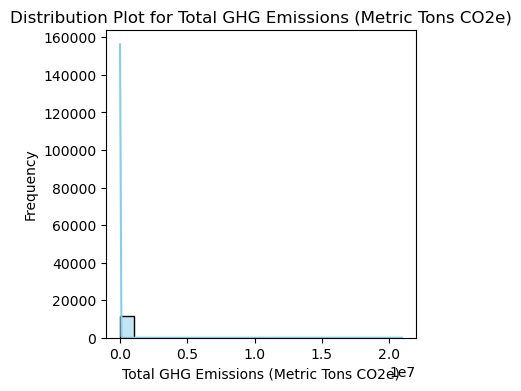

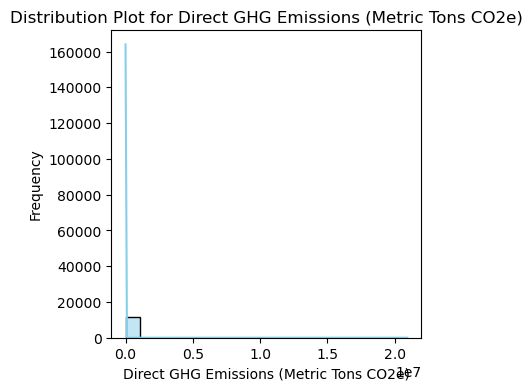

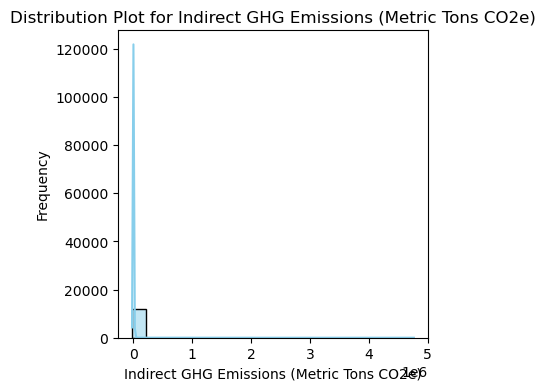

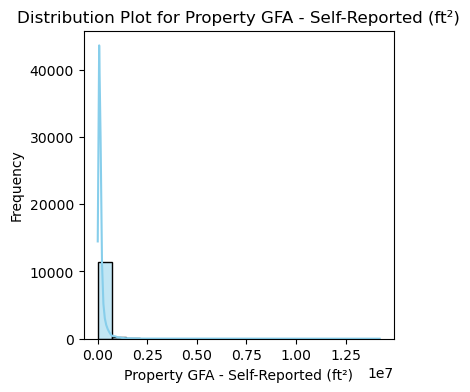

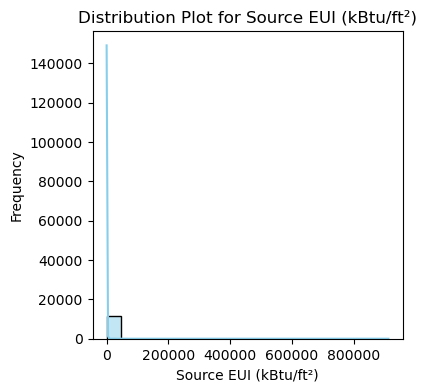

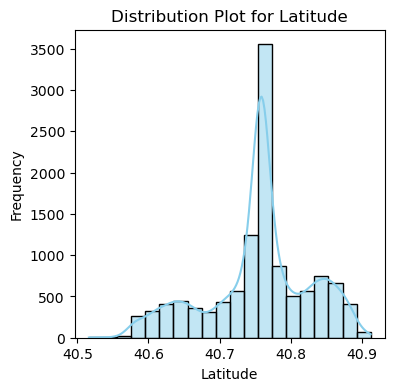

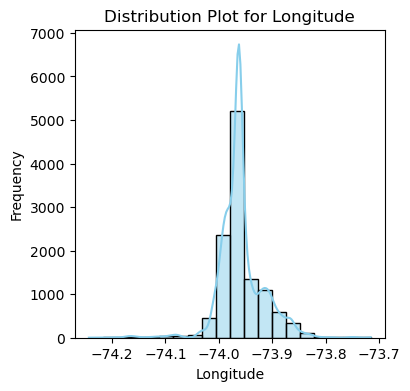

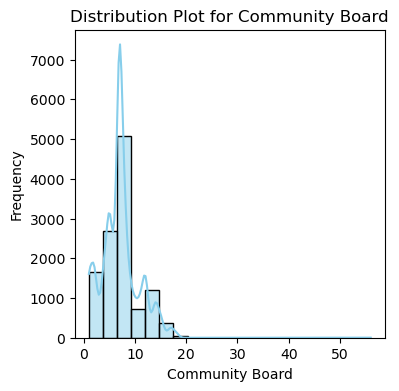

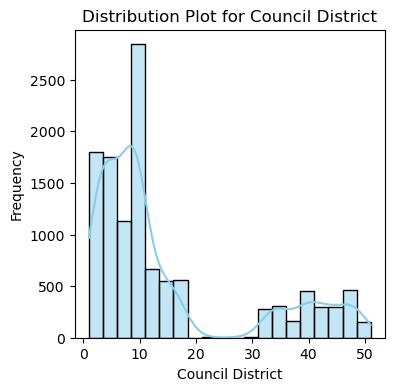

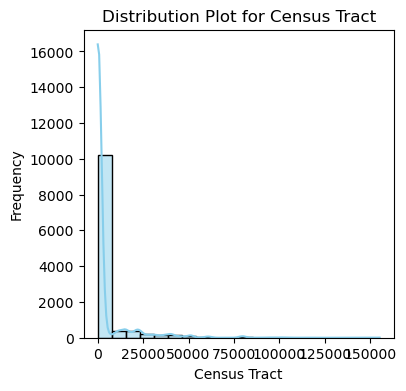

In [22]:
num_df = X_df.select_dtypes(include=['int64', 'float64'])
for column in num_df:
    plt.figure(figsize=(4, 4))
    sns.histplot(num_df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Some of the features are near normaly distribution and some of them are skewed it is may be due to the presence of outliers let us check for outliers 

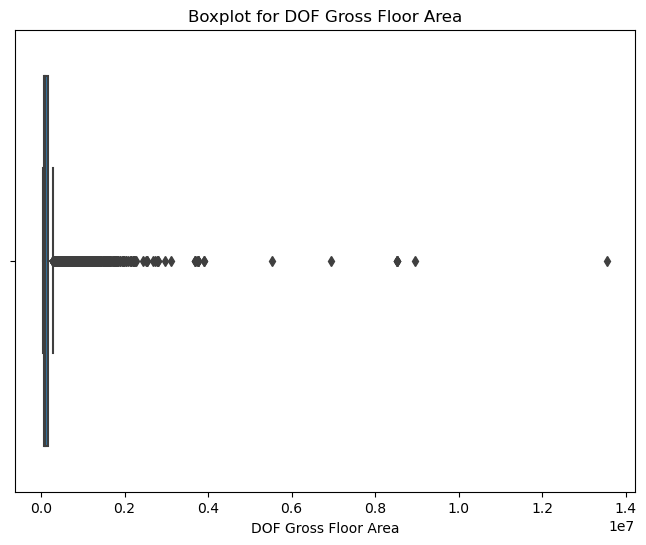

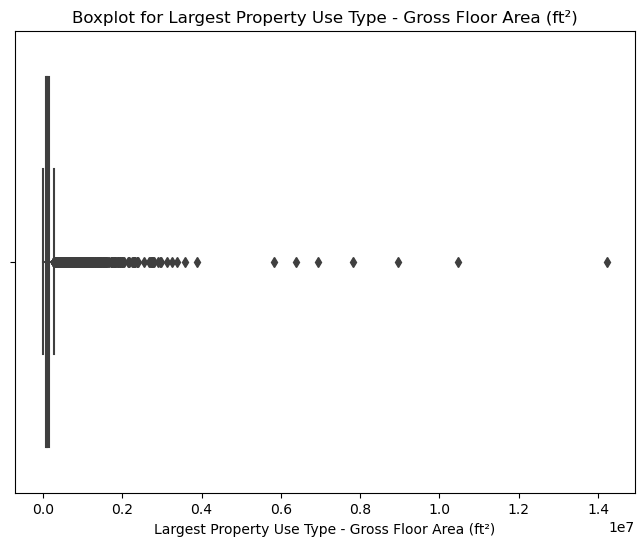

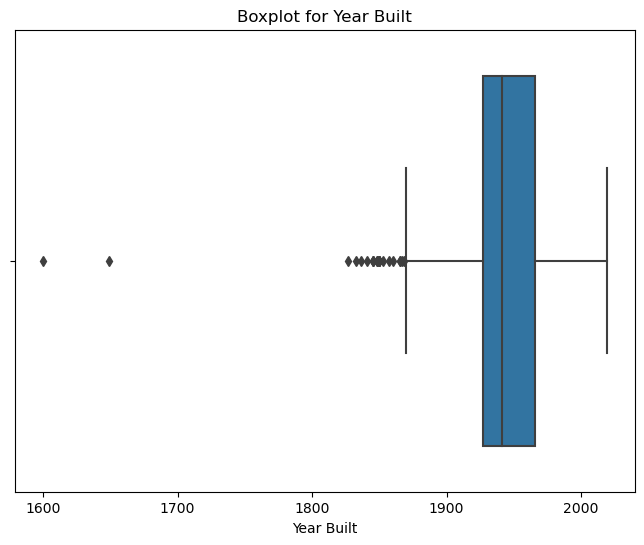

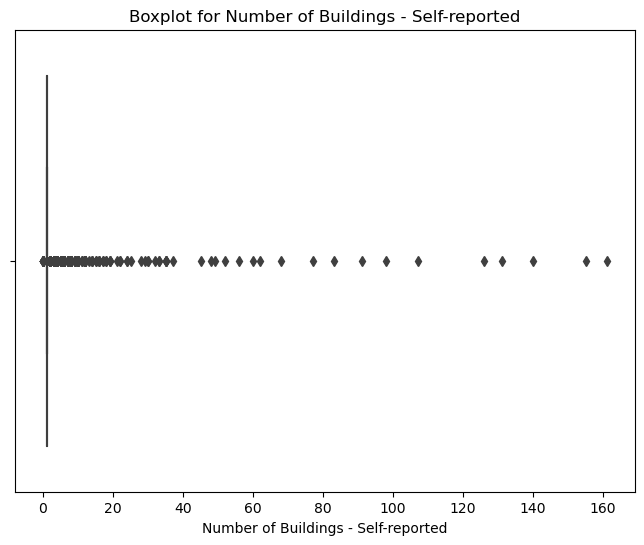

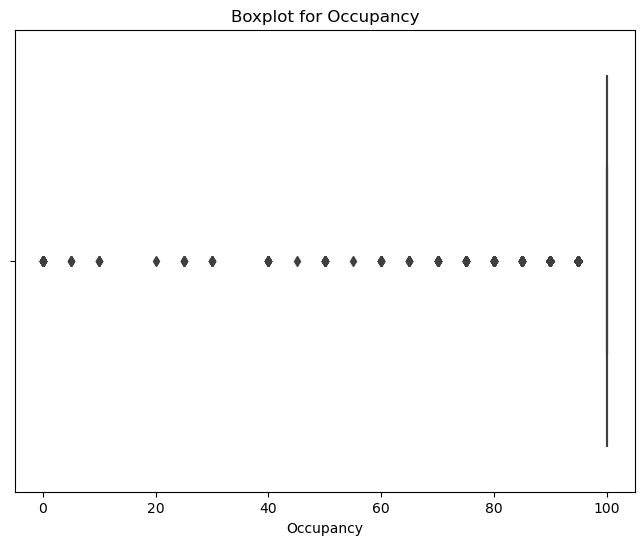

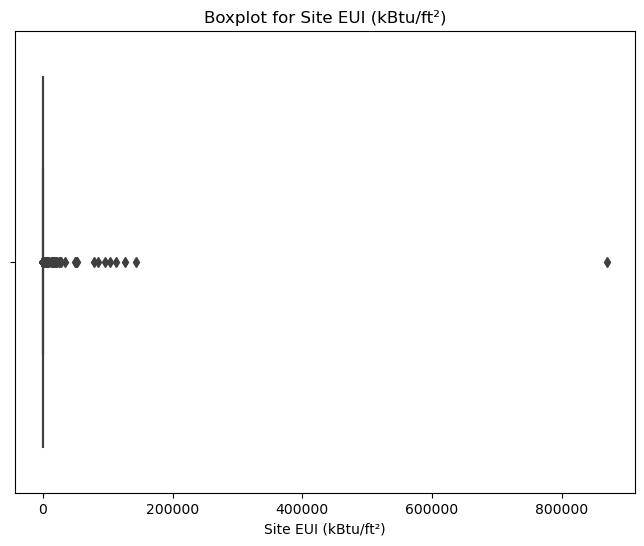

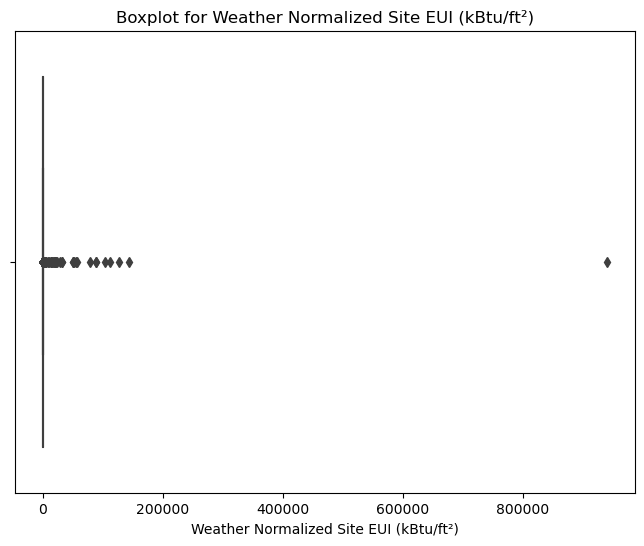

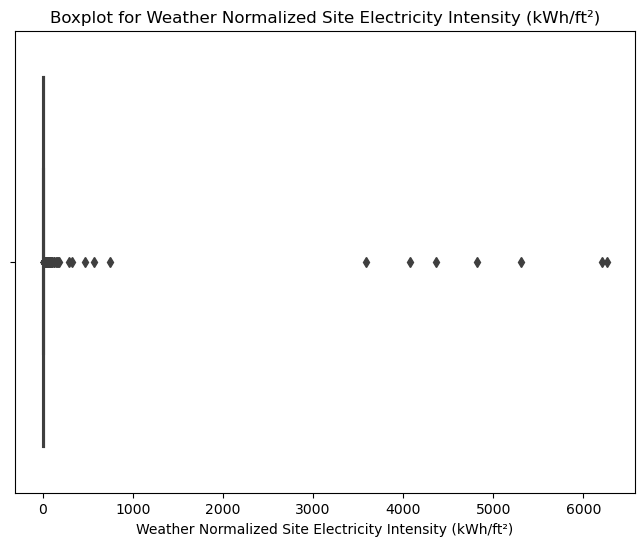

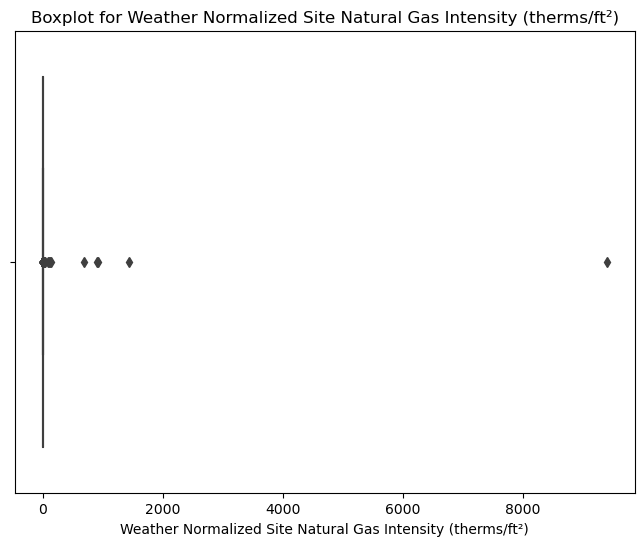

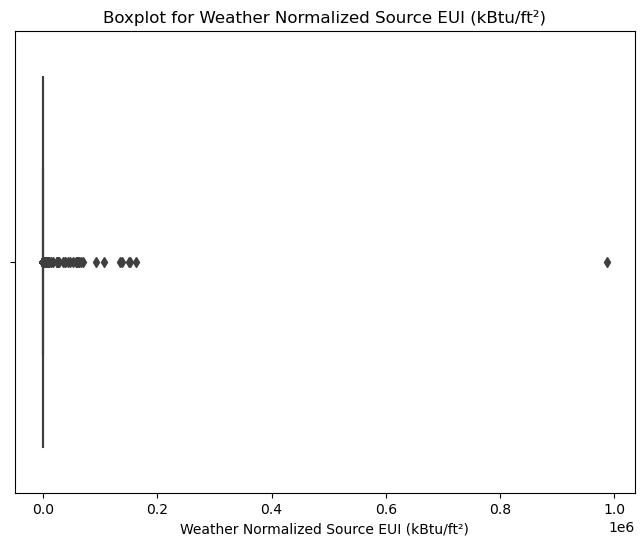

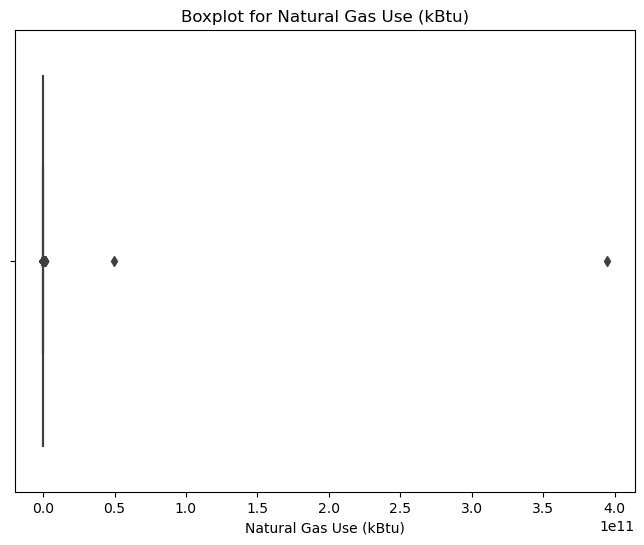

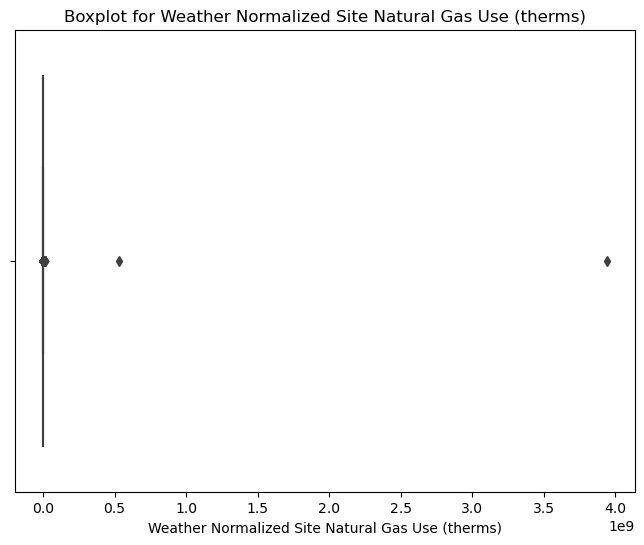

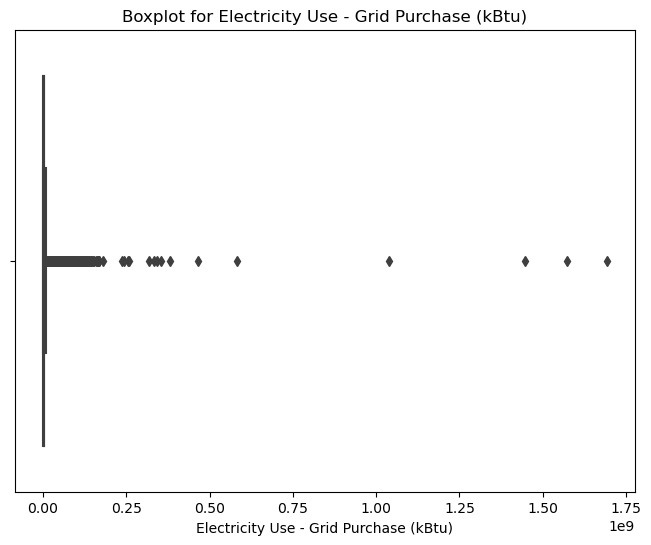

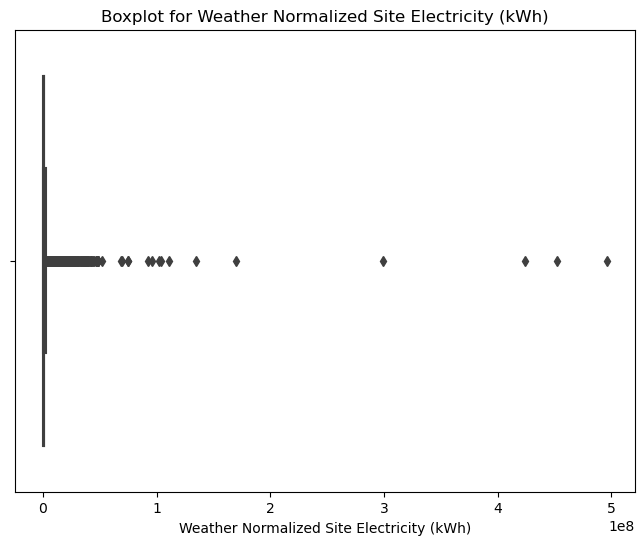

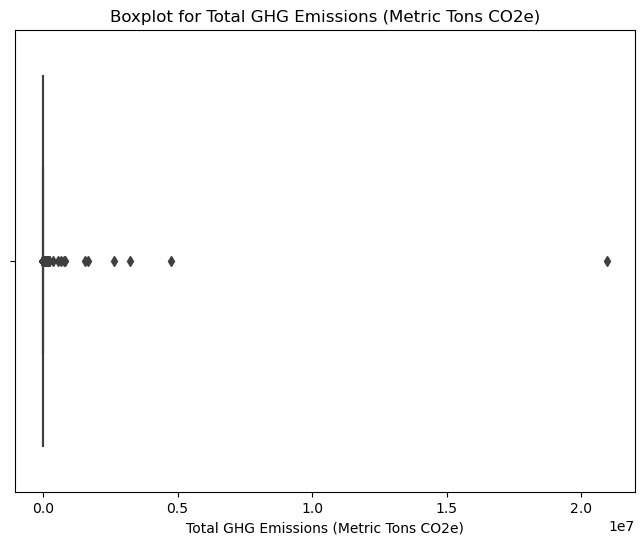

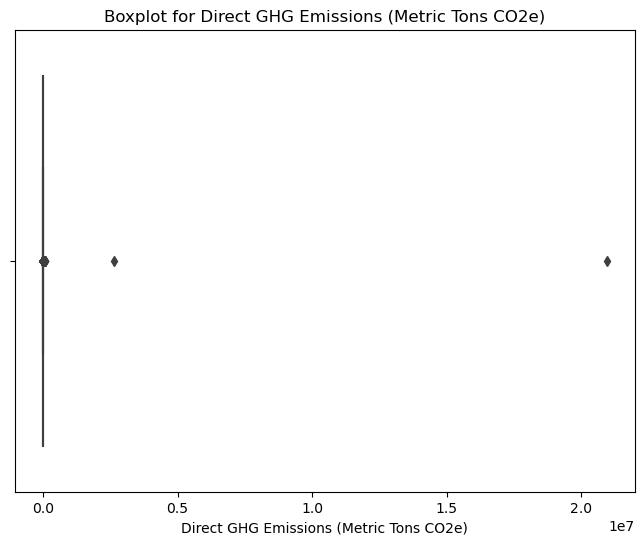

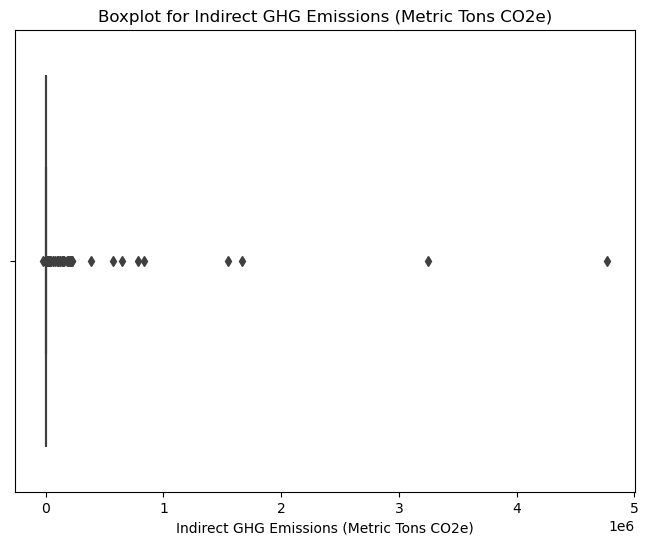

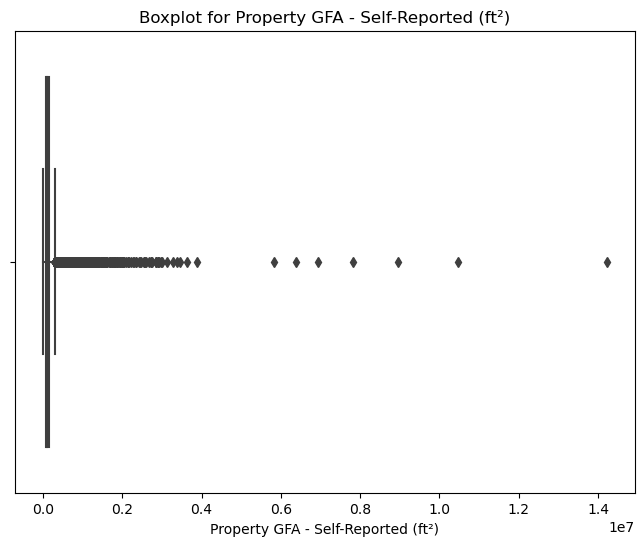

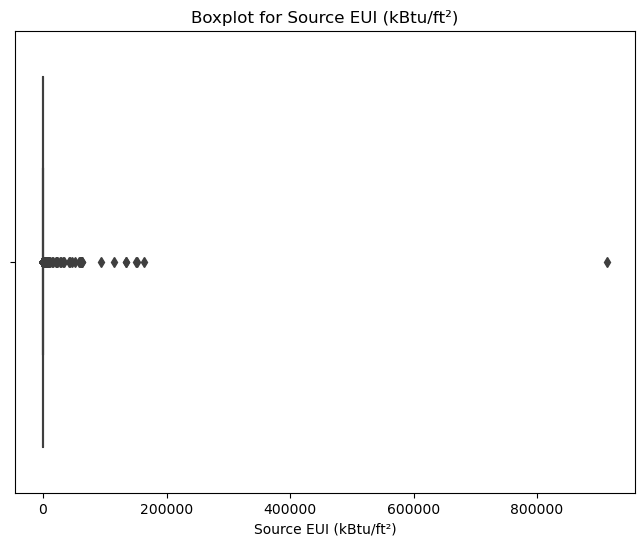

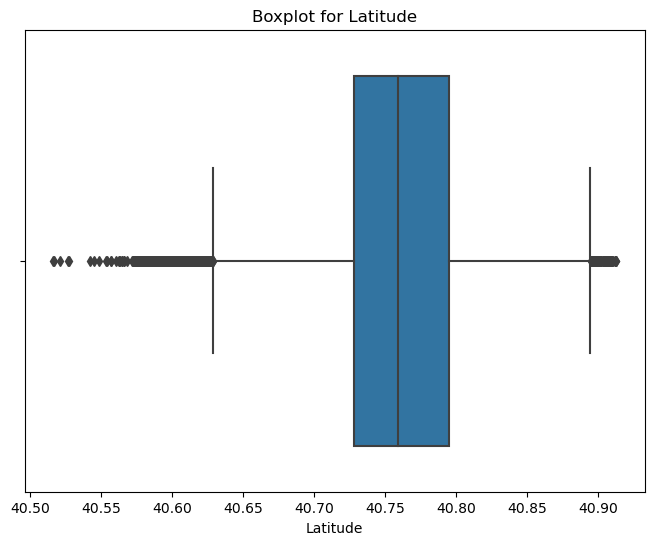

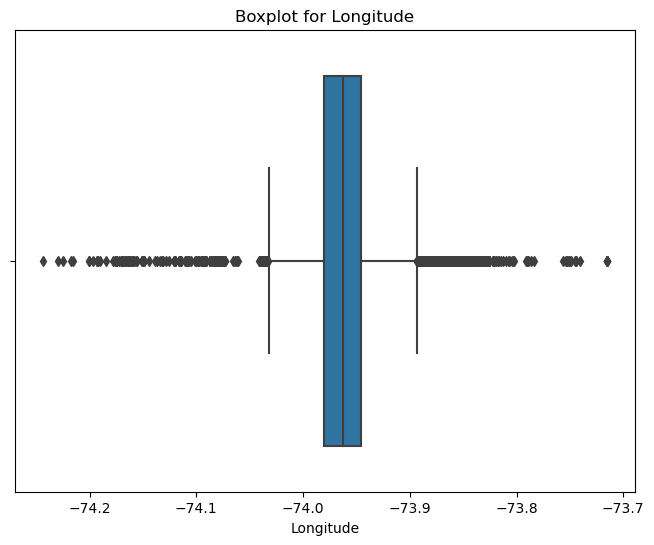

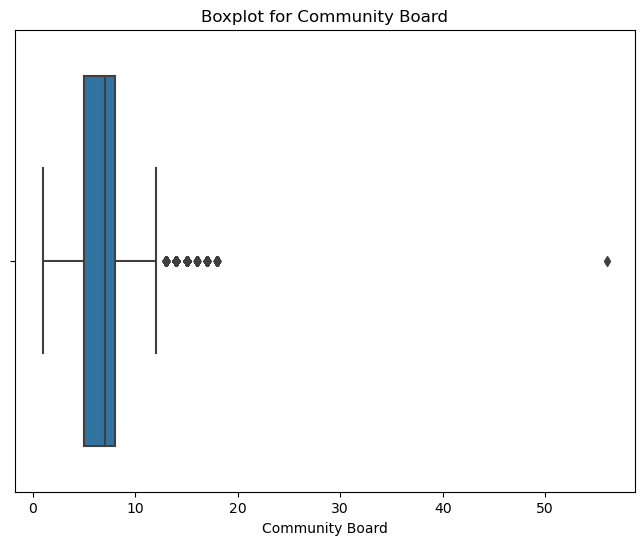

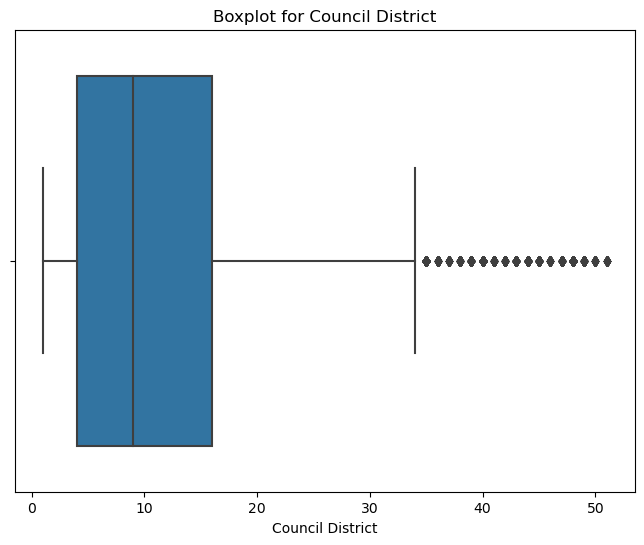

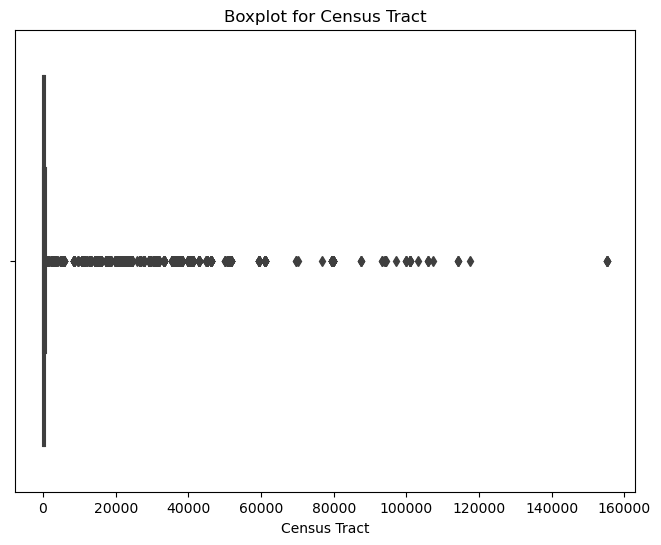

In [23]:
for column in num_df:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=num_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [24]:
# find % outliers in each numerical column

def percentage_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    percentage = (sum(outliers) / len(column)) * 100

    return percentage

# Calculate percentage of outliers for each column
percentage_outliers_per_column = num_df.apply(percentage_outliers)

# Display the result
print("Percentage of outliers in each column:")
print(percentage_outliers_per_column)

Percentage of outliers in each column:
DOF Gross Floor Area                                          11.297463
Largest Property Use Type - Gross Floor Area (ft²)            10.675975
Year Built                                                     0.204325
Number of Buildings - Self-reported                            4.069470
Occupancy                                                      7.330155
Site EUI (kBtu/ft²)                                            7.381236
Weather Normalized Site EUI (kBtu/ft²)                        10.343947
Weather Normalized Site Electricity Intensity (kWh/ft²)        8.334752
Weather Normalized Site Natural Gas Intensity (therms/ft²)     1.464328
Weather Normalized Source EUI (kBtu/ft²)                       9.824621
Natural Gas Use (kBtu)                                         8.190022
Weather Normalized Site Natural Gas Use (therms)               8.666780
Electricity Use - Grid Purchase (kBtu)                        11.408139
Weather Normalized Site E

### We observe that the outliers in each column are less than 20% we can impute them with the median value

In [25]:
for column in num_df:
    Q1 = np.percentile(num_df[column], 25)
    Q3 = np.percentile(num_df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (num_df[column] < lower_bound) | (num_df[column] > upper_bound)
    num_df[column][outliers] = num_df[column].median()

num_df.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
0,289356.0,91324.0,1963.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,500.25,0.0,171.8,94080.0,124.9,40.750791,-73.973963,6.0,4.0,88.0
1,93138.5,91324.0,1969.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,500.25,272.6,171.8,94080.0,124.9,40.841402,-73.942568,12.0,10.0,251.0
2,152765.0,231342.0,1924.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,0.00,0.0,0.0,231342.0,124.9,40.840427,-73.940249,12.0,10.0,251.0
3,93138.5,91324.0,1971.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,0.00,0.0,0.0,94080.0,124.9,40.840746,-73.942854,12.0,10.0,255.0
4,211400.0,179694.0,1932.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,0.00,0.0,0.0,179694.0,124.9,40.841559,-73.942528,12.0,10.0,255.0


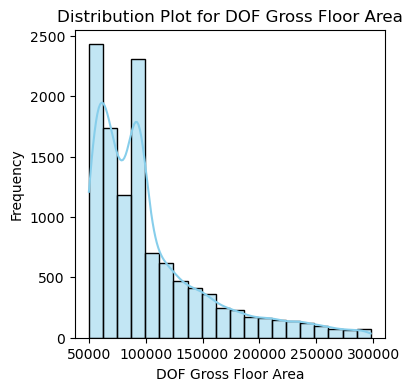

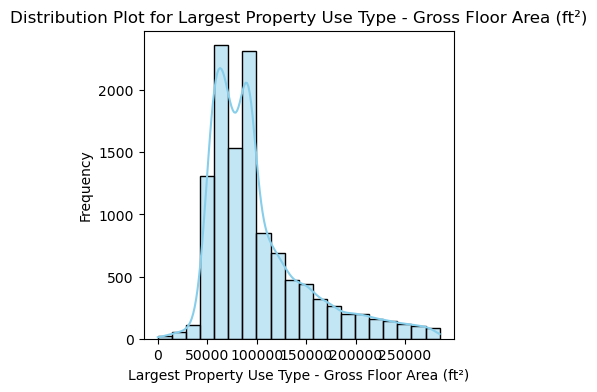

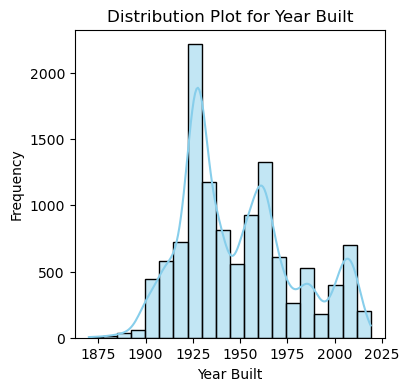

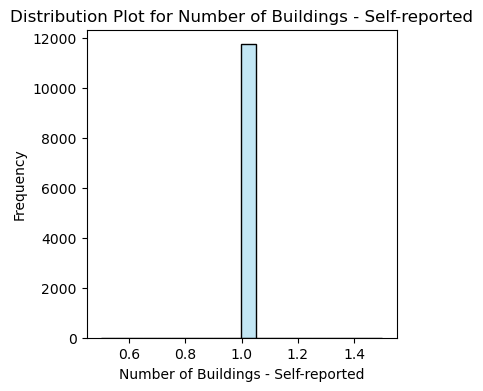

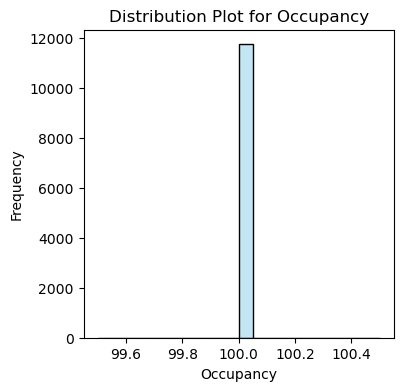

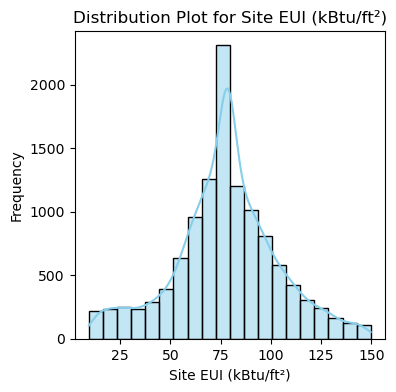

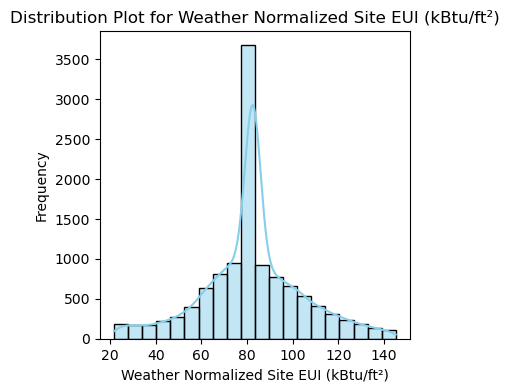

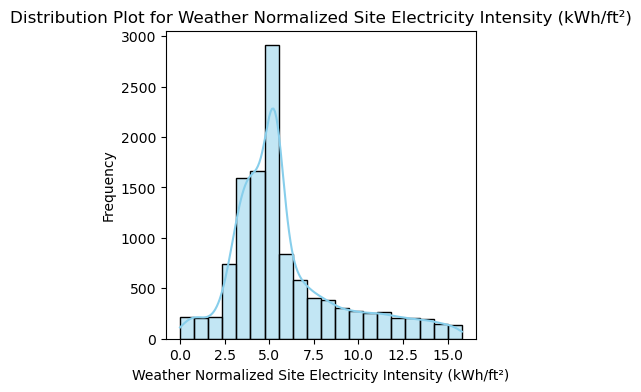

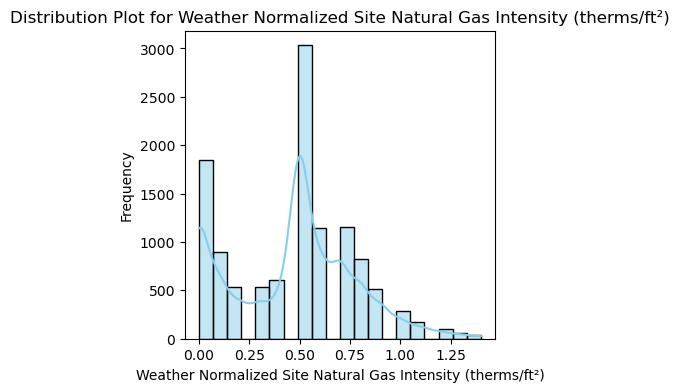

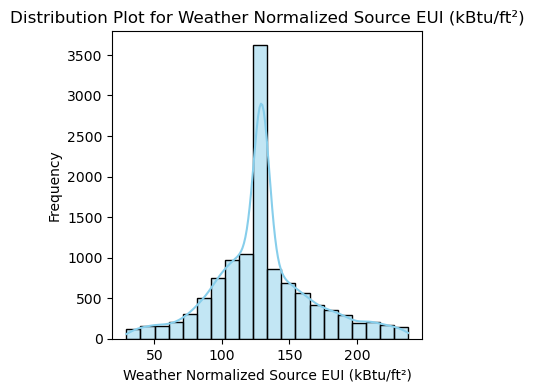

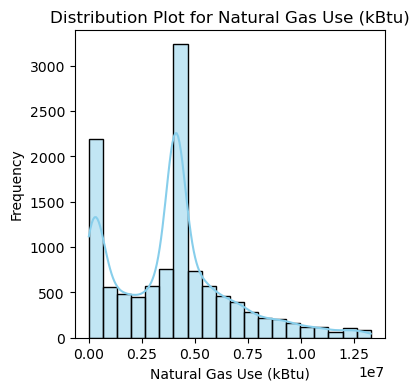

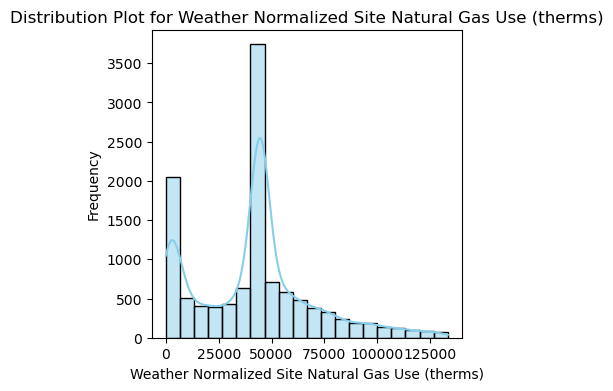

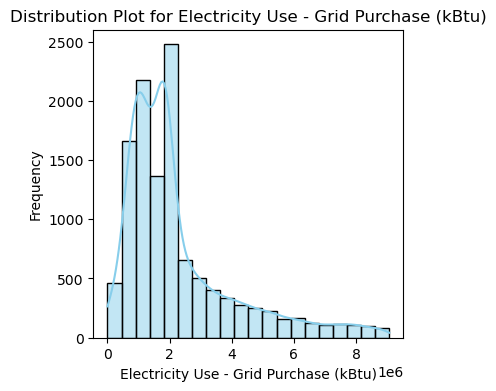

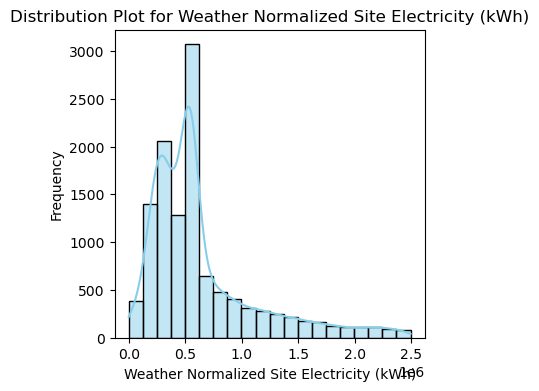

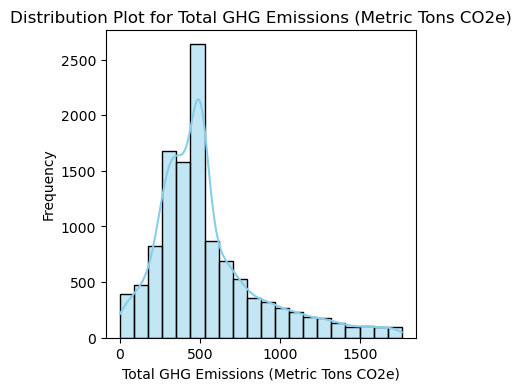

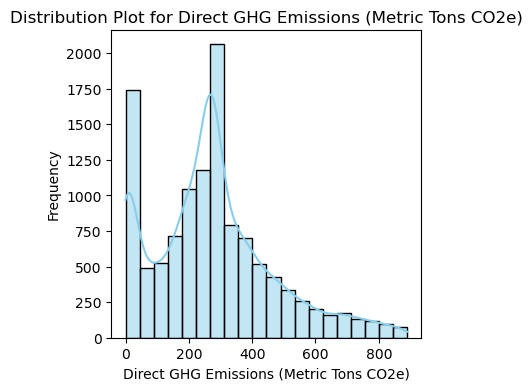

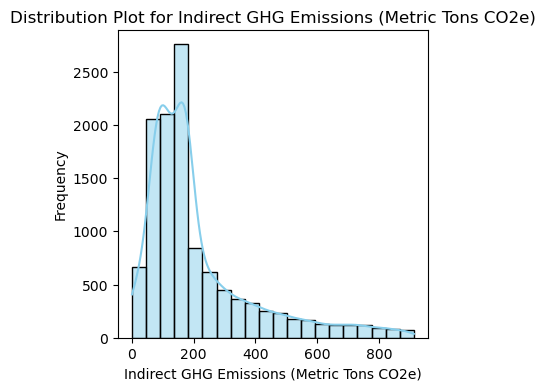

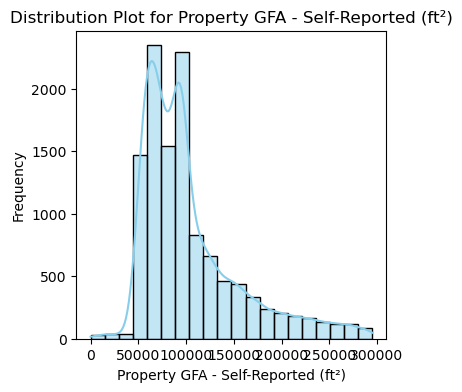

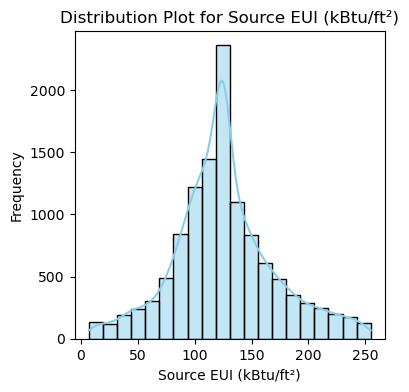

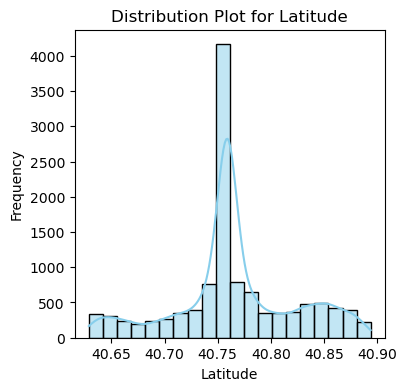

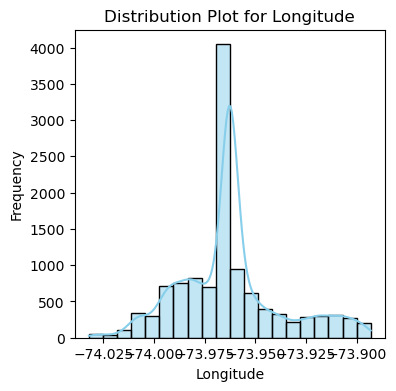

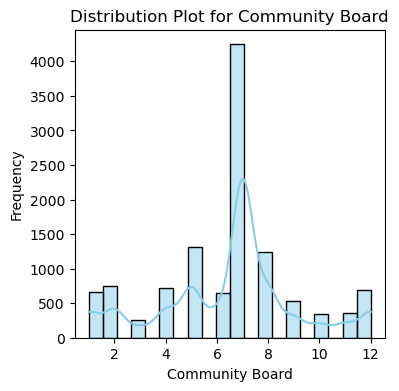

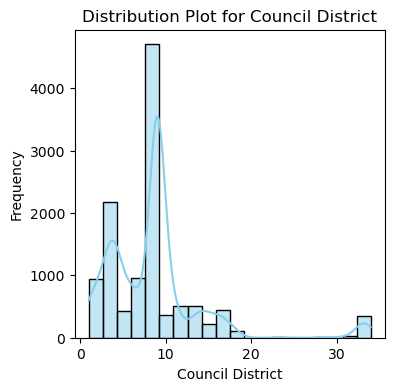

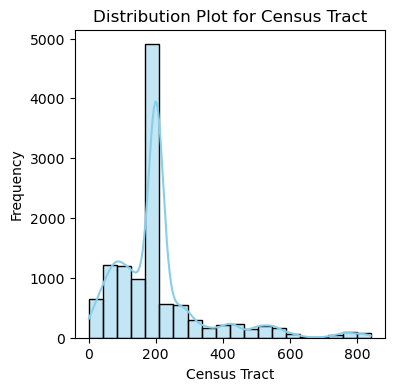

In [26]:
#Visualising the columns after imputing outliers
for column in num_df:
    plt.figure(figsize=(4, 4))
    sns.histplot(num_df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Now the Features have nearly Normal distribution

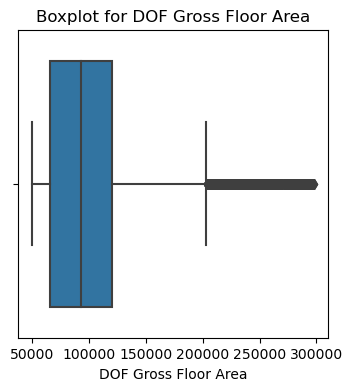

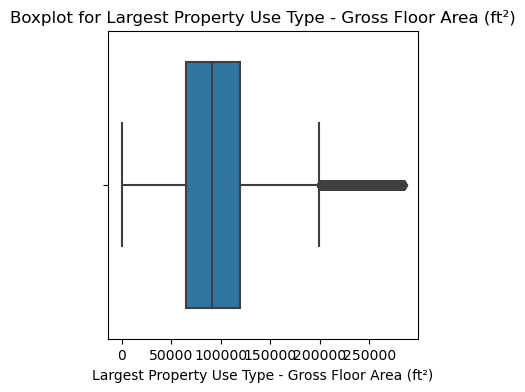

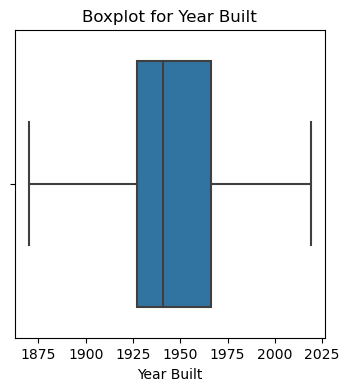

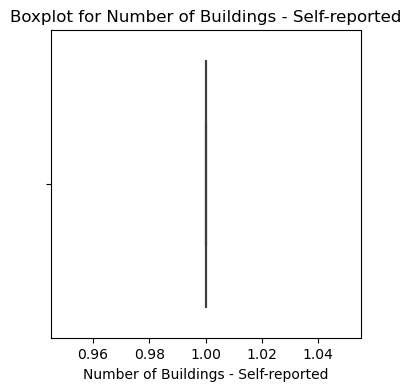

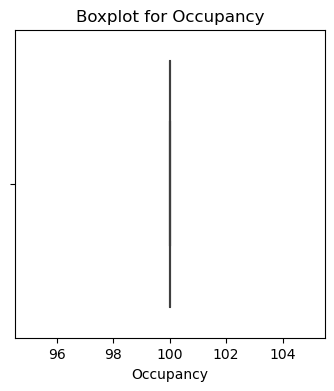

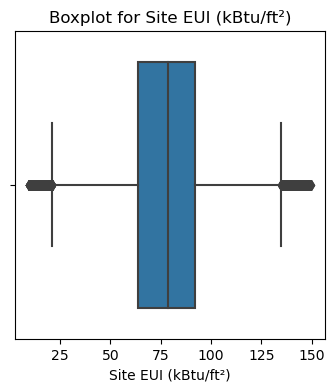

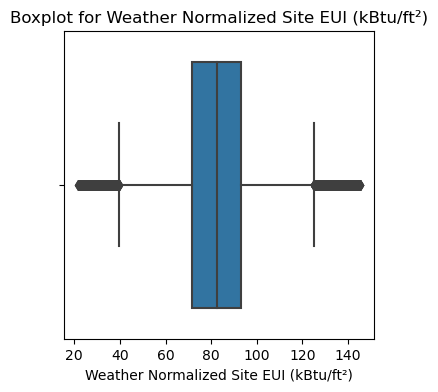

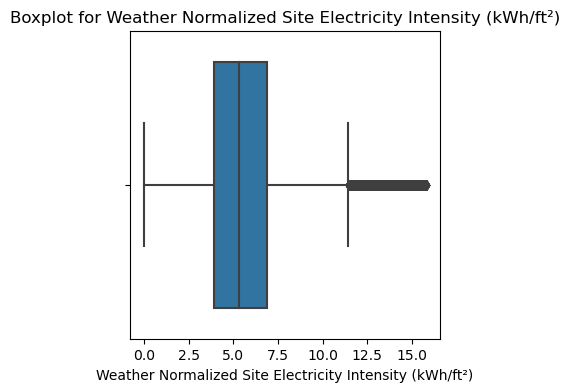

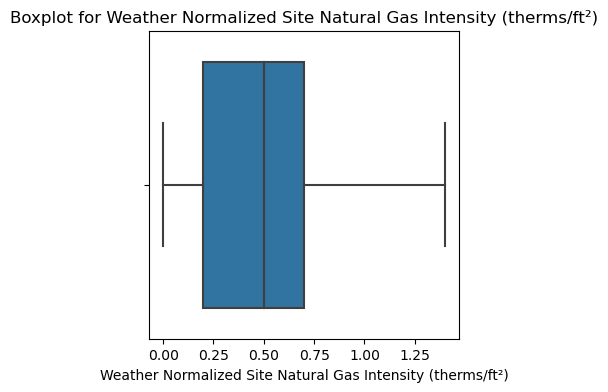

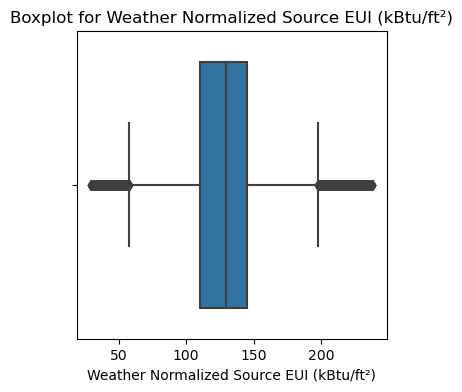

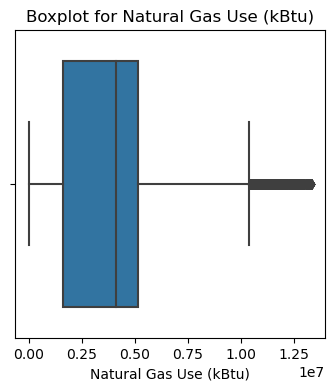

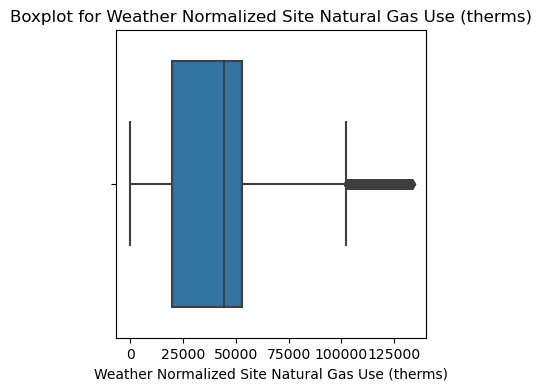

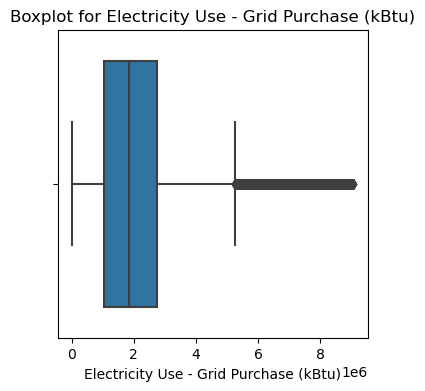

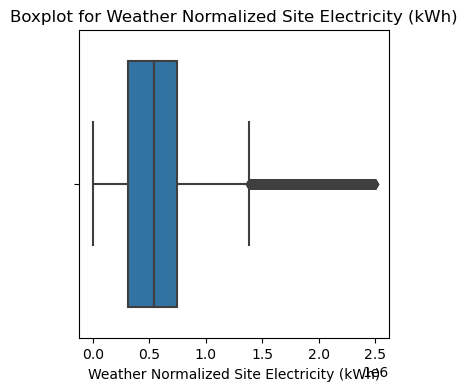

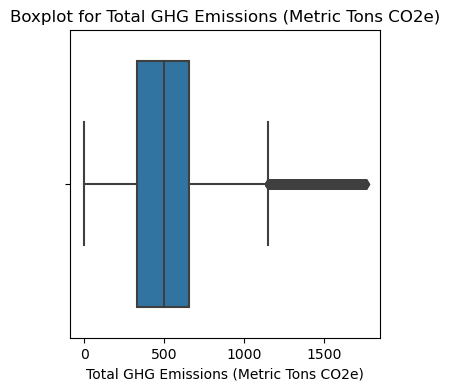

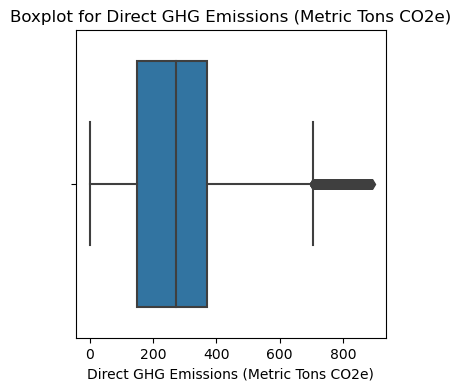

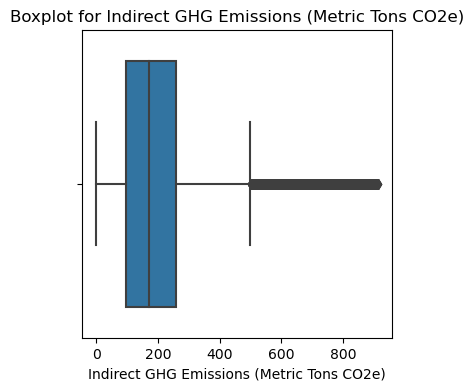

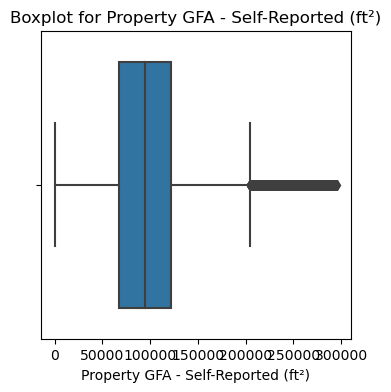

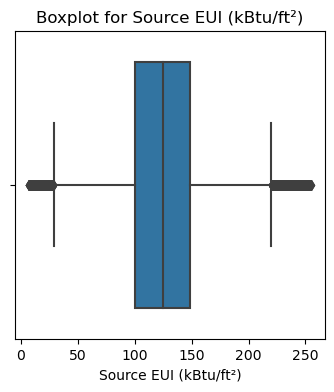

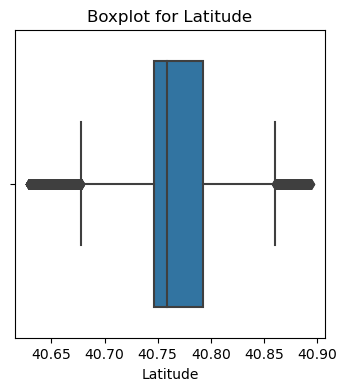

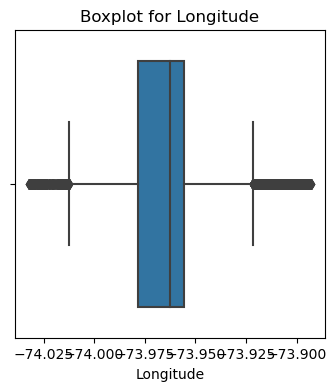

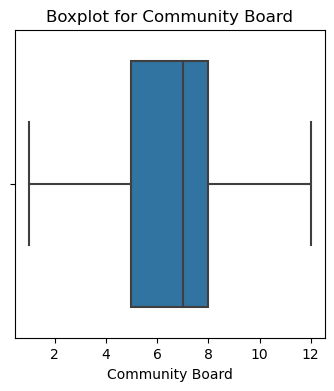

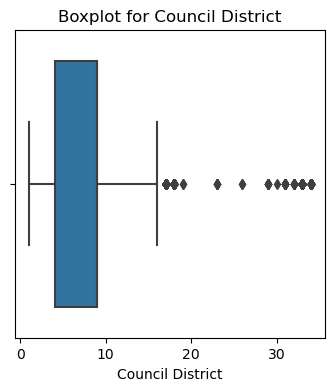

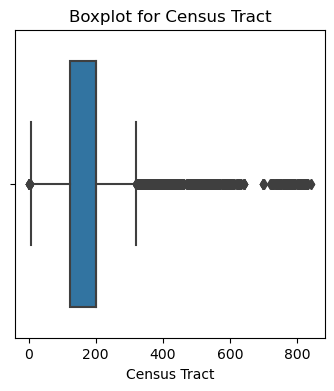

In [27]:
for column in num_df:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=num_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

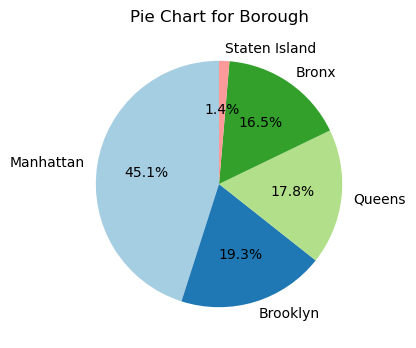

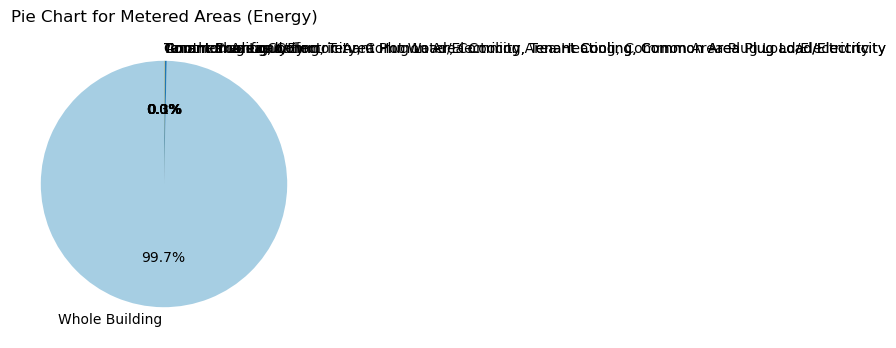

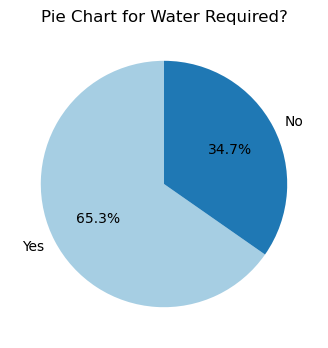

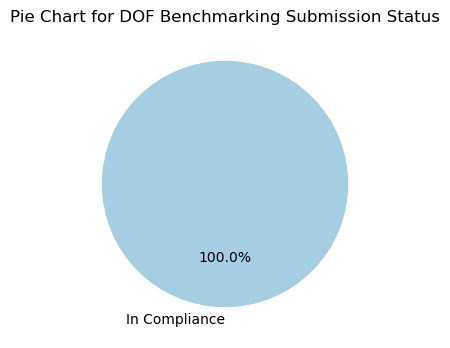

In [28]:
cat_df = X_df.select_dtypes(include=['object'])

# Plot pie charts for each categorical column
for column in cat_df:
    plt.figure(figsize=(4, 4))
    category_counts = X_df[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart for {column}')
    plt.show()

In [29]:
 cat_df.head()

,Borough,Metered Areas (Energy),Water Required?,DOF Benchmarking Submission Status
0,Manhattan,Whole Building,No,In Compliance
1,Manhattan,Whole Building,No,In Compliance
2,Manhattan,Whole Building,No,In Compliance
3,Manhattan,Whole Building,No,In Compliance
4,Manhattan,Whole Building,No,In Compliance


In [30]:
cat_df["DOF Benchmarking Submission Status"].unique()

array(['In Compliance'], dtype=object)

#### The column "DOF Benchmarking Submission Status" has a one unique value it has no variance after encoding it so lets drom this column

In [31]:
cat_df = cat_df=cat_df.drop(["DOF Benchmarking Submission Status"],axis=1)

## Encoding the Categorical Columns

In [32]:
cat_df.Borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'],
      dtype=object)

"Borough" column got 5 unique values lets encode it using one-hot encoding

In [33]:
one_hot_encoded = pd.get_dummies(cat_df["Borough"],drop_first=True)

# Merge the one-hot encoded features back into the original DataFrame
cat_df = pd.concat([cat_df, one_hot_encoded], axis=1)

# Drop the original categorical column since it's no longer needed
cat_df = cat_df.drop(["Borough"], axis=1)
cat_df.head()

,Metered Areas (Energy),Water Required?,Brooklyn,Manhattan,Queens,Staten Island
0,Whole Building,No,0,1,0,0
1,Whole Building,No,0,1,0,0
2,Whole Building,No,0,1,0,0
3,Whole Building,No,0,1,0,0
4,Whole Building,No,0,1,0,0


In [34]:
cat_df["Metered Areas (Energy)"].nunique()

7

"Metered Areas (Energy)" column got 7 unique values lets encode it using one-hot encoding

In [35]:
one_hot_encoded = pd.get_dummies(cat_df["Metered Areas (Energy)"],drop_first=True)

# Merge the one-hot encoded features back into the original DataFrame
cat_df = pd.concat([cat_df, one_hot_encoded], axis=1)

# Drop the original categorical column since it's no longer needed
cat_df = cat_df.drop(["Metered Areas (Energy)"], axis=1)
cat_df.head()

,Water Required?,Brooklyn,Manhattan,Queens,Staten Island,"Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity",Common areas only,"Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity","Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity",Tenant areas only,Whole Building
0,No,0,1,0,0,0,0,0,0,0,1
1,No,0,1,0,0,0,0,0,0,0,1
2,No,0,1,0,0,0,0,0,0,0,1
3,No,0,1,0,0,0,0,0,0,0,1
4,No,0,1,0,0,0,0,0,0,0,1


In [36]:
cat_df["Water Required?"].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
one_hot_encoded = pd.get_dummies(cat_df["Water Required?"],drop_first=True)

# Merge the one-hot encoded features back into the original DataFrame
cat_df = pd.concat([cat_df, one_hot_encoded], axis=1)

# Drop the original categorical column since it's no longer needed
cat_df = cat_df.drop(["Water Required?"], axis=1)
cat_df.head()

,Brooklyn,Manhattan,Queens,Staten Island,"Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity",Common areas only,"Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity","Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity",Tenant areas only,Whole Building,Yes
0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0


In [38]:
num_df.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
0,289356.0,91324.0,1963.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,500.25,0.0,171.8,94080.0,124.9,40.750791,-73.973963,6.0,4.0,88.0
1,93138.5,91324.0,1969.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,500.25,272.6,171.8,94080.0,124.9,40.841402,-73.942568,12.0,10.0,251.0
2,152765.0,231342.0,1924.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,0.00,0.0,0.0,231342.0,124.9,40.840427,-73.940249,12.0,10.0,251.0
3,93138.5,91324.0,1971.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,0.00,0.0,0.0,94080.0,124.9,40.840746,-73.942854,12.0,10.0,255.0
4,211400.0,179694.0,1932.0,1.0,100.0,78.5,82.5,5.3,0.5,129.4,...,0.00,0.0,0.0,179694.0,124.9,40.841559,-73.942528,12.0,10.0,255.0


### we shall drop columns with zero variance during the modeling phase of a machine learning project. Columns with zero variance provide no information for the model,because they have constant values and do not contribute to the variability in the data.

In [40]:
num_df = num_df.loc[:, df.var() != 0]
num_df.shape

(11746, 24)

No Column has zero variance

## Check for Multicolinearity
We shall eliminate the highly correlated features as they introduce Multicolinearity

In [41]:
corr_matrix=num_df.corr()

#let us put 0.7 as the threshold correlation for the multicolinearity
threshold = 0.7

# Identify and remove highly correlated features
features_to_remove = []
for col in corr_matrix.columns:
    for other_col in corr_matrix.columns:
        if col != other_col and abs(corr_matrix.loc[col, other_col]) >= threshold:
            features_to_remove.append(other_col)

# Drop identified features
num_df_filtered = num_df.drop(features_to_remove, axis=1)


In [42]:
num_df_filtered.shape

(11746, 11)

#### There were 13 Features out of 24 having more than 0.7 correlation wich could have introduced multicolinearity, they have been droped

In [44]:
num_df_filtered.head()

,Year Built,Number of Buildings - Self-reported,Occupancy,Weather Normalized Site Electricity Intensity (kWh/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Latitude,Longitude,Community Board,Council District,Census Tract
0,1963.0,1.0,100.0,5.3,500.25,0.0,40.750791,-73.973963,6.0,4.0,88.0
1,1969.0,1.0,100.0,5.3,500.25,272.6,40.841402,-73.942568,12.0,10.0,251.0
2,1924.0,1.0,100.0,5.3,0.00,0.0,40.840427,-73.940249,12.0,10.0,251.0
3,1971.0,1.0,100.0,5.3,0.00,0.0,40.840746,-73.942854,12.0,10.0,255.0
4,1932.0,1.0,100.0,5.3,0.00,0.0,40.841559,-73.942528,12.0,10.0,255.0


In [45]:
num_df_filtered.shape

(11746, 11)

In [46]:
num_df_filtered.shape

(11746, 11)

### correlation Heatmap

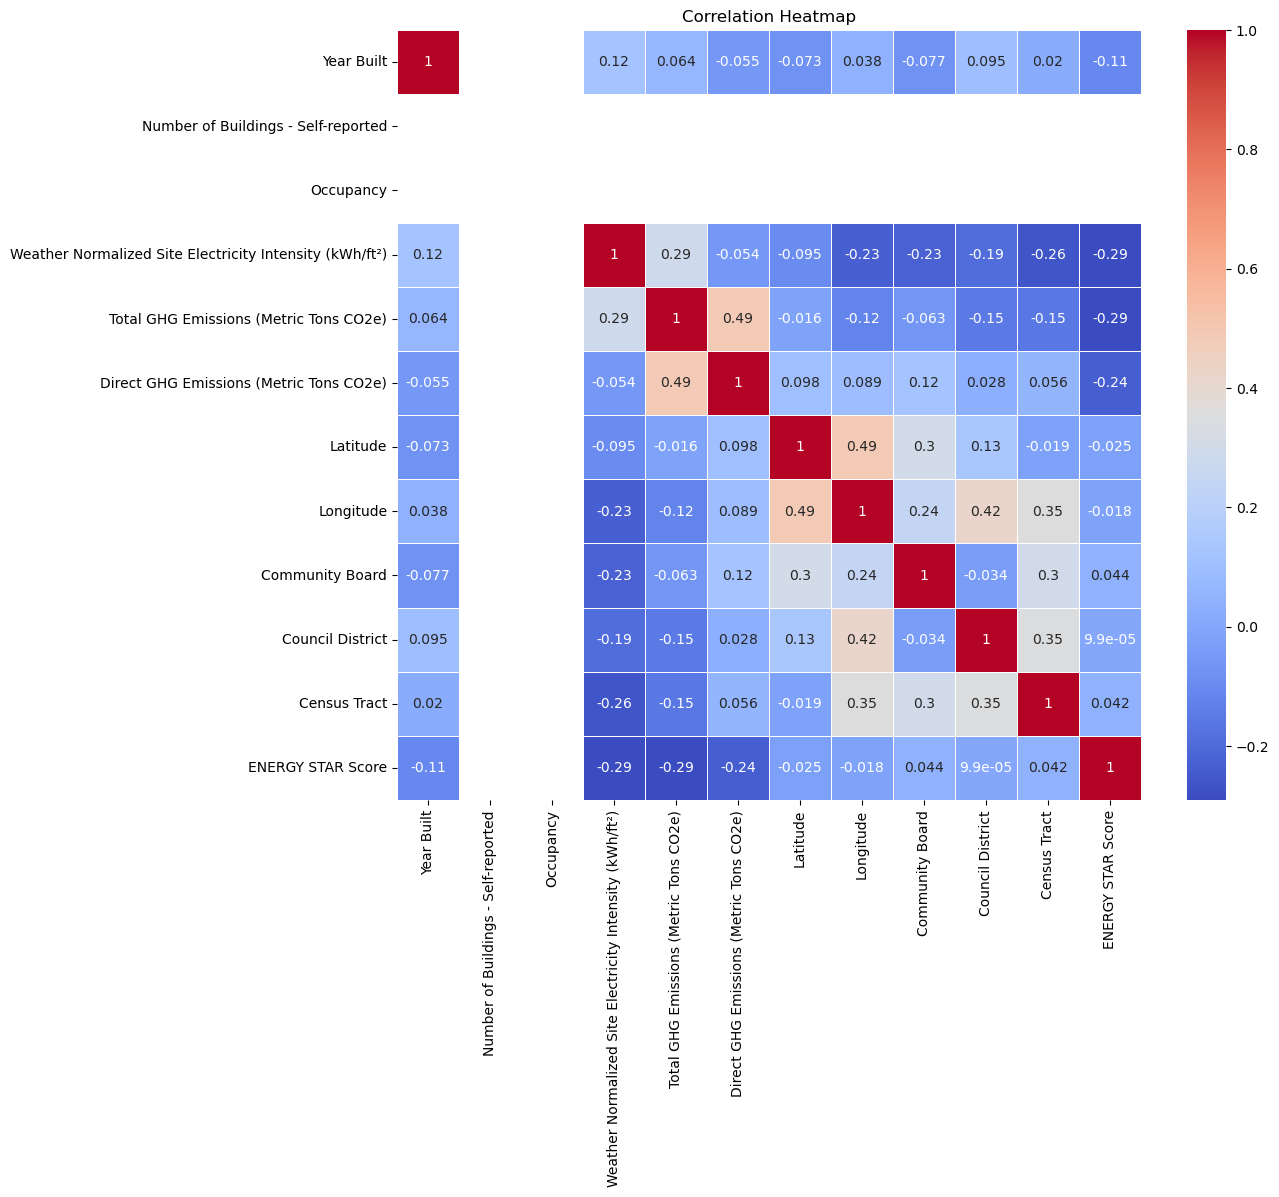

In [47]:
num_df_t=pd.concat([num_df_filtered,Y_df],axis=1)
correlation_matrix = num_df_t.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
num_df_filtered.head()

,Year Built,Number of Buildings - Self-reported,Occupancy,Weather Normalized Site Electricity Intensity (kWh/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Latitude,Longitude,Community Board,Council District,Census Tract
0,1963.0,1.0,100.0,5.3,500.25,0.0,40.750791,-73.973963,6.0,4.0,88.0
1,1969.0,1.0,100.0,5.3,500.25,272.6,40.841402,-73.942568,12.0,10.0,251.0
2,1924.0,1.0,100.0,5.3,0.00,0.0,40.840427,-73.940249,12.0,10.0,251.0
3,1971.0,1.0,100.0,5.3,0.00,0.0,40.840746,-73.942854,12.0,10.0,255.0
4,1932.0,1.0,100.0,5.3,0.00,0.0,40.841559,-73.942528,12.0,10.0,255.0


## Standardising the Numerical Features

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_num=scaler.fit_transform(num_df_filtered)
scaled_num_df=pd.DataFrame(scaled_num,columns=num_df_filtered.columns)
scaled_num_df.head()

,Year Built,Number of Buildings - Self-reported,Occupancy,Weather Normalized Site Electricity Intensity (kWh/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Latitude,Longitude,Community Board,Council District,Census Tract
0,0.468311,0.0,0.0,-0.191704,-0.137573,-1.424494,-0.264293,-0.440555,-0.183886,-0.781657,-0.852801
1,0.668479,0.0,0.0,-0.191704,-0.137573,-0.016248,1.331056,0.795884,2.041692,0.234184,0.321843
2,-0.832780,0.0,0.0,-0.191704,-1.622727,-1.424494,1.313889,0.887214,2.041692,0.234184,0.321843
3,0.735201,0.0,0.0,-0.191704,-1.622727,-1.424494,1.319506,0.784620,2.041692,0.234184,0.350669
4,-0.565890,0.0,0.0,-0.191704,-1.622727,-1.424494,1.333820,0.797459,2.041692,0.234184,0.350669


In [50]:
#concatenate the Scaled numerical Df and Categorical df
df=pd.concat([scaled_num_df,cat_df,Y_df],axis=1)
df.head()

,Year Built,Number of Buildings - Self-reported,Occupancy,Weather Normalized Site Electricity Intensity (kWh/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Latitude,Longitude,Community Board,Council District,...,Queens,Staten Island,"Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity",Common areas only,"Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity","Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity",Tenant areas only,Whole Building,Yes,ENERGY STAR Score
0,0.468311,0.0,0.0,-0.191704,-0.137573,-1.424494,-0.264293,-0.440555,-0.183886,-0.781657,...,0,0,0,0,0,0,0,1,0,65.0
1,0.668479,0.0,0.0,-0.191704,-0.137573,-0.016248,1.331056,0.795884,2.041692,0.234184,...,0,0,0,0,0,0,0,1,0,55.0
2,-0.832780,0.0,0.0,-0.191704,-1.622727,-1.424494,1.313889,0.887214,2.041692,0.234184,...,0,0,0,0,0,0,0,1,0,65.0
3,0.735201,0.0,0.0,-0.191704,-1.622727,-1.424494,1.319506,0.784620,2.041692,0.234184,...,0,0,0,0,0,0,0,1,0,65.0
4,-0.565890,0.0,0.0,-0.191704,-1.622727,-1.424494,1.333820,0.797459,2.041692,0.234184,...,0,0,0,0,0,0,0,1,0,65.0


## Train_Test_split

In [51]:
from sklearn.model_selection import train_test_split

X=df.drop(["ENERGY STAR Score"],axis=1)
y=df["ENERGY STAR Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.shape)
print(X_train.shape)
print(X_test.shape)

(11746, 23)
(9396, 22)
(2350, 22)


# Multiple Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

#Training
MLR=LinearRegression()
MLR.fit(X_train,y_train)

#Prediction
y_pred_train = MLR.predict(X_train)
y_pred_test = MLR.predict(X_test)

coefficients = MLR.coef_
intercept = MLR.intercept_
print("coefficients : ", coefficients)
print("Intercept : ", intercept)

coefficients :  [-2.31655893e+00  1.77635684e-15 -6.66133815e-15 -7.50721164e+00
 -3.26984794e+00 -5.27294532e+00 -7.60371780e-02 -1.00332575e+00
  5.33196949e-02 -1.56246254e-01 -5.50860908e-02  1.47011230e+00
  3.86549203e+00  3.42160579e+00  6.65833324e+00 -8.88178420e-16
 -9.71549938e+00  1.18615934e+01  5.61468921e+00 -2.06875019e+01
 -3.71170172e+00 -6.32635401e-01]
Intercept :  62.374900278187084


## Evaluation of MLR model

In [53]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#evalution of training data
MLR_train_MSE = mean_squared_error(y_train,y_pred_train)
MLR_train_MAE = mean_absolute_error(y_train,y_pred_train)
MLR_train_R2 = r2_score(y_train,y_pred_train)
print(f'Mean Squared Error (MSE) of train data: {MLR_train_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of train data: {MLR_train_MAE:.2f}')
print(f'R-squared (R2): {MLR_train_R2:.2f}')
print('-----------------------------------------')

#evalution on testing data
MLR_test_MSE = mean_squared_error(y_test,y_pred_test)
MLR_test_MAE = mean_absolute_error(y_test,y_pred_test)
MLR_test_R2 = r2_score(y_test,y_pred_test)

print(f'Mean Squared Error (MSE) of test data: {MLR_test_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of test data: {MLR_test_MAE:.2f}')
print(f'R-squared (R2): {MLR_test_R2:.2f}')

Mean Squared Error (MSE) of train data: 610.69
Mean Absolute Error (MSE) of train data: 20.05
R-squared (R2): 0.17
-----------------------------------------
Mean Squared Error (MSE) of test data: 628.16
Mean Absolute Error (MSE) of test data: 20.14
R-squared (R2): 0.18


## Ploting the Actual vs Predicted values

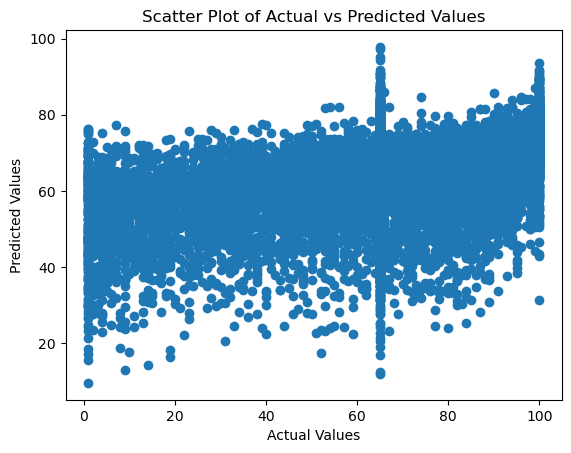

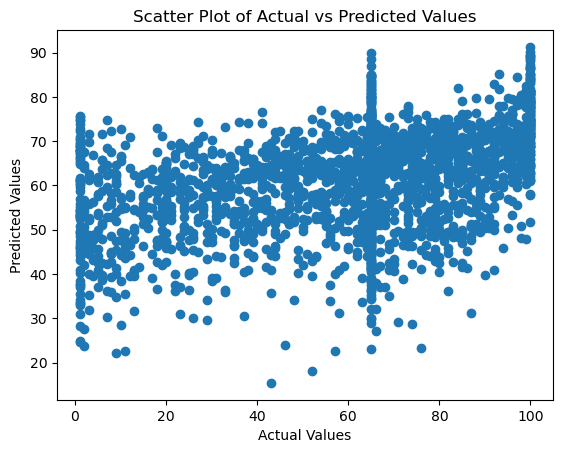

In [54]:
# Plotting Actual vs Predicted Values on Train data
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

# Plotting Actual vs Predicted Values on Test data
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()


# Ridge Regression 

In [57]:
from sklearn.linear_model import Ridge
alpha = 5.0  # Regularization strength (tuning parameter)
ridge_model = Ridge(alpha=alpha)

# Training
ridge_model.fit(X_train, y_train)

# Predictions 
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

### Evaluation of Ridge Model

In [58]:
#evalution of training data
Ridge_train_MSE = mean_squared_error(y_train,y_pred_train)
Ridge_train_MAE = mean_absolute_error(y_train,y_pred_train)
Ridge_train_R2 = r2_score(y_train,y_pred_train)
print(f'Mean Squared Error (MSE) of train data: {Ridge_train_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of train data: {Ridge_train_MAE:.2f}')
print(f'R-squared (R2): {Ridge_train_R2:.2f}')
print('-----------------------------------------')

#evalution on testing data
Ridge_test_MSE = mean_squared_error(y_test,y_pred_test)
Ridge_test_MAE = mean_absolute_error(y_test,y_pred_test)
Ridge_test_R2 = r2_score(y_test,y_pred_test)

print(f'Mean Squared Error (MSE) of test data: {Ridge_test_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of test data: {Ridge_test_MAE:.2f}')
print(f'R-squared (R2): {Ridge_test_R2:.2f}')

Mean Squared Error (MSE) of train data: 610.75
Mean Absolute Error (MSE) of train data: 20.06
R-squared (R2): 0.17
-----------------------------------------
Mean Squared Error (MSE) of test data: 628.28
Mean Absolute Error (MSE) of test data: 20.14
R-squared (R2): 0.18


Ther is no much difference in results lets try Lasso regression

# Lasso Regression

In [59]:
from sklearn.linear_model import Lasso
alpha = 1.0 
lasso_model = Lasso(alpha=alpha)

# Train the model 
lasso_model.fit(X_train, y_train)

# Make predictions 
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

### Evaluating Lasso Model

In [60]:
Lasso_train_MSE = mean_squared_error(y_train,y_pred_train)
Lasso_train_MAE = mean_absolute_error(y_train,y_pred_train)
Lasso_train_R2 = r2_score(y_train,y_pred_train)
print(f'Mean Squared Error (MSE) of train data: {Lasso_train_MSE :.2f}')
print(f'Mean Absolute Error (MSE) of train data: {Lasso_train_MAE:.2f}')
print(f'R-squared (R2): {Lasso_train_R2:.2f}')
print('-----------------------------------------')

#evalution on testing data
Lasso_test_MSE = mean_squared_error(y_test,y_pred_test)
Lasso_test_MAE = mean_absolute_error(y_test,y_pred_test)
Lasso_test_R2 = r2_score(y_test,y_pred_test)

print(f'Mean Squared Error (MSE) of test data: {Lasso_test_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of test data: {Lasso_test_MAE:.2f}')
print(f'R-squared (R2): {Lasso_test_R2:.2f}')

Mean Squared Error (MSE) of train data: 617.28
Mean Absolute Error (MSE) of train data: 20.17
R-squared (R2): 0.16
-----------------------------------------
Mean Squared Error (MSE) of test data: 636.94
Mean Absolute Error (MSE) of test data: 20.27
R-squared (R2): 0.16


Even with Lasso we are not getting better results

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,random_state=42)

# Training the model
RFR.fit(X_train,y_train)

# Prediction
y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)


### Evaluation of Random Forest model

In [62]:
RFR_train_MSE = mean_squared_error(y_train,y_pred_train)
RFR_train_MAE = mean_absolute_error(y_train,y_pred_train)
RFR_train_R2 = r2_score(y_train,y_pred_train)

print(f'Mean Squared Error (MSE) of train data: {RFR_train_MSE :.2f}')
print(f'Mean Absolute Error (MSE) of train data: {RFR_train_MAE:.2f}')
print(f'R-squared (R2): {RFR_train_R2:.2f}')
print('-----------------------------------------')

#evalution on testing data
RFR_test_MSE = mean_squared_error(y_test,y_pred_test)
RFR_test_MAE = mean_absolute_error(y_test,y_pred_test)
RFR_test_R2 = r2_score(y_test,y_pred_test)

print(f'Mean Squared Error (MSE) of test data: {RFR_test_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of test data: {RFR_test_MAE:.2f}')
print(f'R-squared (R2): {RFR_test_R2:.2f}')

Mean Squared Error (MSE) of train data: 64.32
Mean Absolute Error (MSE) of train data: 6.29
R-squared (R2): 0.91
-----------------------------------------
Mean Squared Error (MSE) of test data: 446.74
Mean Absolute Error (MSE) of test data: 16.76
R-squared (R2): 0.41


* We can observe that the Random forest Regressor model has worked better it has Mean Absolute Error 16.76 on test data which less than the Multiple Linear Regression with MAE 20.27

* Also the r-squred is higher, that means this model predicted better results

* But Prediction on training data is much higher(MAE=6.29) than training data(MAE=16.76) 

# Support Vector Regressor

In [63]:
from sklearn.svm import SVR

svr_model = SVR(C=5, epsilon=0.1)

# Train the model on the training data
svr_model.fit(X_train,y_train)

# Make predictions on the testing data
y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)


###  Evalution of SVR Model

In [64]:
svr_train_MSE = mean_squared_error(y_train,y_pred_train)
svr_train_MAE = mean_absolute_error(y_train,y_pred_train)
svr_train_R2 = r2_score(y_train,y_pred_train)

print(f'Mean Squared Error (MSE) of train data: {svr_train_MSE :.2f}')
print(f'Mean Absolute Error (MSE) of train data: {svr_train_MAE:.2f}')
print(f'R-squared (R2): {svr_train_R2:.2f}')
print('-----------------------------------------')

#evalution on testing data
svr_test_MSE = mean_squared_error(y_test,y_pred_test)
svr_test_MAE = mean_absolute_error(y_test,y_pred_test)
svr_test_R2 = r2_score(y_test,y_pred_test)

print(f'Mean Squared Error (MSE) of test data: {svr_test_MSE:.2f}')
print(f'Mean Absolute Error (MSE) of test data: {svr_test_MAE:.2f}')
print(f'R-squared (R2): {svr_test_R2:.2f}')

Mean Squared Error (MSE) of train data: 509.78
Mean Absolute Error (MSE) of train data: 17.29
R-squared (R2): 0.31
-----------------------------------------
Mean Squared Error (MSE) of test data: 552.48
Mean Absolute Error (MSE) of test data: 17.92
R-squared (R2): 0.28


## Comapring The Models

In [66]:
algorithms = ['Linear Regression', "Ridge", "Lasso", "Random Forest", "SVR"]
R_squred = [MLR_test_R2,Ridge_test_R2,Lasso_test_R2,RFR_test_R2,svr_test_R2]
print(R_squred)

[0.17628961777604912, 0.1761258866758988, 0.16476806517895215, 0.4141882357260115, 0.27551927189502956]


In [68]:
algorithms = ['Linear Regression', "Ridge", "Lasso", "Random Forest", "SVR"]
R_squred = [MLR_test_R2,Ridge_test_R2,Lasso_test_R2,RFR_test_R2,svr_test_R2]
#creating dataframe
data = {
    'Algorithms':algorithms,
    'R_squared_values': R_squred
}

R_squared_df = pd.DataFrame(data)
R_squared_df.head()

,Algorithms,R_squared_values
0,Linear Regression,0.176290
1,Ridge,0.176126
2,Lasso,0.164768
3,Random Forest,0.414188
4,SVR,0.275519


#### PLotting the R-2 Values on Bar Plot

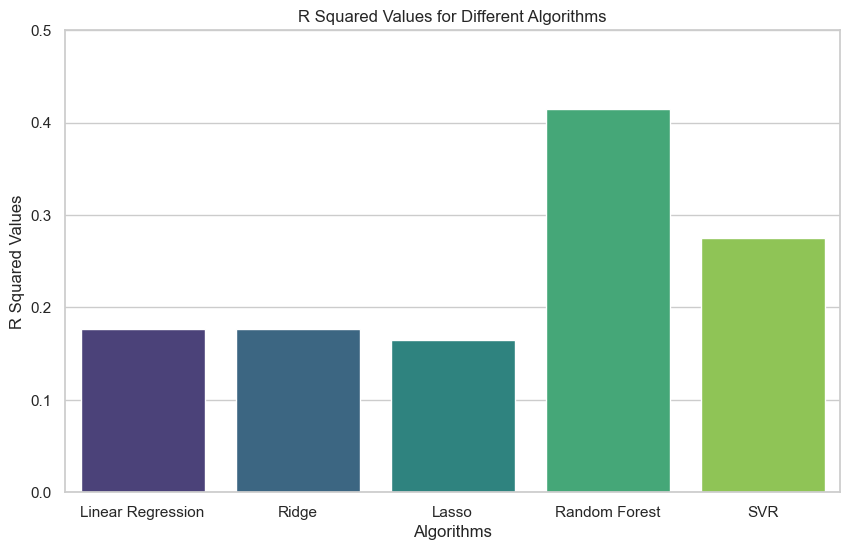

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithms', y='R_squared_values', data=R_squared_df, palette='viridis')
plt.xlabel('Algorithms')
plt.ylabel('R Squared Values')
plt.title('R Squared Values for Different Algorithms')
plt.ylim(0, 0.5)  # Set the y-axis range from 0 to 1 for ROC AUC values
plt.show()

# Conclusion
*  In this Project I have done Data Cleanig, Preprocessing, Exploratory Data Analysis, Training and Testing of the Data using Various Machine Learning algorithms
*  As per the above Barplot Random Forest Regressor is the best model among other models as it has a R Squared value of 41.42%   on the Testing data